<!-- <div id="toc_container"> -->
<h2>Table of Contents</h2>
<ul class="toc_list">
  <a href="#1&nbsp;&nbsp;General-Analysis-Information">1&nbsp;&nbsp;General Analysis Information</a><br>
    <ul>
    <a href="#1.1&nbsp;&nbsp;Project-summary">1.1&nbsp;&nbsp;Project summary</a><br>
    <a href="#1.2&nbsp;&nbsp;Project-directory">1.2&nbsp;&nbsp;Project directory</a><br>
    </ul>
  <a href="#2&nbsp;&nbsp;Manifest-preparation">2&nbsp;&nbsp;Manifest preparation</a><br>
    <ul>
    <a href="#2.1&nbsp;&nbsp;Metadata-overview">2.1&nbsp;&nbsp;Metadata overview</a><br>
    <a href="#2.2&nbsp;&nbsp;Receipt-selection">2.2&nbsp;&nbsp;Receipt selection</a><br>
    <a href="#2.3&nbsp;&nbsp;Output-manifest">2.3&nbsp;&nbsp;Output manifest</a><br>  
    </ul>
  <a href="#3&nbsp;&nbsp;Sequencing-information">3&nbsp;&nbsp;Sequencing information</a><br>
    <ul>
    <a href="#3.1&nbsp;&nbsp;Yaml-parameters">3.1&nbsp;&nbsp;Yaml parameters</a><br>
    <a href="#3.2&nbsp;&nbsp;Pipeline-run">3.2&nbsp;&nbsp;Pipeline run</a><br>
    </ul>
  <a href="#4&nbsp;&nbsp;Quality-control">4&nbsp;&nbsp;Quality control</a><br>
    <ul>
    <a href="#4.1&nbsp;&nbsp;Trimming">4.1&nbsp;&nbsp;Trimming</a><br>
    <a href="#4.2&nbsp;&nbsp;Non-bacterial-reads">4.2&nbsp;&nbsp;Non-bacterial reads</a><br>
    <a href="#4.3&nbsp;&nbsp;Sequencing-depth-distribution-per-flow-cell">4.3&nbsp;&nbsp;Sequencing depth distribution per flow cell</a><br>
    <a href="#4.4&nbsp;&nbsp;Read-counts-after-pre-process-filtering">4.4&nbsp;&nbsp;Read counts after pre process filtering</a><br>
    </ul>
  <a href="#5&nbsp;&nbsp;Sample-selection">5&nbsp;&nbsp;Sample selection</a><br>
    <ul>
    <a href="#3.5&nbsp;&nbsp;Biological-replicates">3.5&nbsp;&nbsp;Biological replicates</a><br>
    <a href="#3.6&nbsp;&nbsp;QC-samples">3.6&nbsp;&nbsp;QC samples</a><br>
    </ul>
  <a href="#4&nbsp;&nbsp;Rarefaction-threshold">4&nbsp;&nbsp;Rarefaction threshold</a><br>
  <a href="#5&nbsp;&nbsp;Alpha-diversity">5&nbsp;&nbsp;Alpha diversity</a><br>
  <a href="#6&nbsp;&nbsp;Beta-diversity">6&nbsp;&nbsp;Beta diversity</a><br>
  <ul>
    <a href="#6.1&nbsp;&nbsp;Bray-Curtis">6.1&nbsp;&nbsp;Bray-Curtis</a><br>
    <a href="#6.2&nbsp;&nbsp;Jaccard">6.2&nbsp;&nbsp;Jaccard</a><br>
    <a href="#6.3&nbsp;&nbsp;Weighted-UniFrac">6.3&nbsp;&nbsp;Weighted UniFrac</a><br>
    <a href="#6.4&nbsp;&nbsp;Unweighted-UniFrac">6.4&nbsp;&nbsp;Unweighted UniFrac</a><br>
  </ul>
</ul>

In [1]:
%%bash
pip install git+https://github.com/webermarcolivier/statannot

  Cloning https://github.com/webermarcolivier/statannot to c:\users\slsevi~1\appdata\local\temp\pip-req-build-x5vmjy74
  Created wheel for statannot: filename=statannot-0.2.2-py3-none-any.whl size=11039 sha256=ff119962c61a2c442993ea03a883c0eb8829df274d7aa49060eb4f06e09f5f88
  Stored in directory: C:\Users\SLSEVI~1\AppData\Local\Temp\pip-ephem-wheel-cache-i41_49tj\wheels\48\70\5d\319e4b342e18b0080826e678683b28bb358cebe0c135651156
Successfully built statannot


  Running command git clone -q https://github.com/webermarcolivier/statannot 'C:\Users\SLSEVI~1\AppData\Local\Temp\pip-req-build-x5vmjy74'


In [2]:
from IPython.display import display
import os.path
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import glob
from scipy import stats
from itertools import combinations
#from skbio.stats.ordination import pcoa
#from skbio import DistanceMatrix
#import os; os.environ['R_HOME'] = "C:\\Miniconda\\lib\\R\\"
import rpy2
sns.set(style="whitegrid")
#import warnings
#warnings.filterwarnings('ignore')
from statannot import add_stat_annotation

<h2 id="1&nbsp;&nbsp;Ge">1&nbsp;&nbsp;General Analysis Information</h2>

<h3 id="1.1&nbsp;&nbsp;Project-summary">1.1&nbsp;&nbsp;Project summary</h3>

AIM 1 consists of a fecal extraction comparison using fresh-frozen fecal material from human donors, and artificial colonies. Samples were extracted using multiple methods, to be examined. The 16S rRNA gene was then sequenced using an Illumina MiSeq from three projects: NP0084-MB4, NP0084-MB5, NP0084-MB6. A summary of the three individual projects is included below:

- NP0084-MB4
- NP0084-MB5
- NP0084-MB6

<h3 id="1.2&nbsp;&nbsp;Project-summary">1.2&nbsp;&nbsp;Project directory</h3>

In [4]:
cgr_proj_dir='/DCEG/Projects/Microbiome/Analysis/NP0084_MB/20200410_2019.1'
proj_dir='/Users/slsevilla/Google Drive/MyDocuments_Current/Education/George Mason University/Dissertation/Data/Aim1/'
img_dir='/Users/slsevilla/Google Drive/MyDocuments_Current/Education/George Mason University/Dissertation/Data/Aim1/output/img'
%cd {proj_dir}

C:\Users\slsevilla\Google Drive\MyDocuments_Current\Education\George Mason University\Dissertation\Data\Aim1


<h2 id="2&nbsp;&nbsp;Manifest-preparation">2&nbsp;&nbsp;Manifest preparation</h3>

<h3 id="2.1&nbsp;&nbsp;Metadata-overview">2.1&nbsp;&nbsp;Metadata overview</h3>

Metadata for the project was included with the metagenomic pipeline requirements.

In [4]:
manifest_path = proj_dir+'manifest//raw_manifest.txt'

manifest = pd.read_csv(glob.glob(manifest_path)[0],sep='\t',index_col=0)
manifest = manifest.dropna(how='all', axis='columns')
manifest.columns = manifest.columns.str.replace(' ', '')

In [5]:
manifest.head()

Source-PCR-Plate                              Run-ID  Project-ID  \
Sample ID                                                                    
SC284724      PC04924_A_12  180112_M01354_0104_000000000-BFN3F  NP0084-MB4   
SC284725      PC04924_B_12  180112_M01354_0104_000000000-BFN3F  NP0084-MB4   
SC284726      PC04924_C_12  180112_M01354_0104_000000000-BFN3F  NP0084-MB4   
SC284727      PC04924_D_12  180112_M01354_0104_000000000-BFN3F  NP0084-MB4   
SC284730      PC04925_A_12  180112_M03599_0134_000000000-BFD9Y  NP0084-MB4   

          CGR-Sample-ID  Sample-Type Sample-Des Subject-ID Reciept  \
Sample ID                                                            
SC284724       SC284724  Seq_Control        MSA    MSA1000     NaN   
SC284725       SC284725  Seq_Control        MSA    MSA1001     NaN   
SC284726       SC284726  Seq_Control        MSA    MSA1002     NaN   
SC284727       SC284727  Seq_Control        MSA    MSA1003     NaN   
SC284730       SC284730  Seq_Control        MSA    MSA1000     NaN   

          Ext-Company Ext-Kit Ext-Robotics Homo-Status Homo-Method Homo-Holder  
Sample ID                                                                       
SC284724          NaN     NaN          NaN         NaN         NaN         NaN  
SC284725          NaN     NaN          NaN         NaN         NaN         NaN  
SC284726          NaN     NaN          NaN         NaN         NaN         NaN  
SC284727          NaN     NaN          NaN         NaN         NaN         NaN  
SC284730          NaN     NaN          NaN         NaN         NaN         NaN

In [6]:
#Print the variables for the metadata
for i in manifest.drop(columns=['Source-PCR-Plate','CGR-Sample-ID']).columns:
    print(i)
    print(*manifest[i].unique(), sep = ", ")  
    print('\n')

Run-ID
180112_M01354_0104_000000000-BFN3F, 180112_M03599_0134_000000000-BFD9Y, 180328_M01354_0106_000000000-BFMHC, 190617_M01354_0118_000000000-CHFG3


Project-ID
NP0084-MB4, NP0084-MB5, NP0084-MB6


Sample-Type
Seq_Control, Ext_Control, Study


Sample-Des
MSA, Seq_Blank, ZymoBiomics, art_col, Biocollective, Ext_Blank, human_1, Robogut


Subject-ID
MSA1000, MSA1001, MSA1002, MSA1003, NTC_Blank, PCR_Blank, D6305, D6306, D6311, DZ35322, DZ35316, Biocollective, Water, human_1, DZ35298, D6300, D6310


Reciept
nan, sFEMB-001-R-034, sFEMB-001-R-039, sFEMB-001-R-040, sFEMB-001-R-051, sFEMB-001-R-052, sFEMB-001-R-053, sFEMB-001-R-054, sFEMB-001-R-055, sFEMB-001-R-004, sFEMB-001-R-012, sFEMB-001-R-043, sFEMB-001-R-044, sFEMB-001-R-017, sFEMB-001-R-013, sFEMB-001-R-014, sFEMB-001-R-045, sFEMB-001-R-046, sFEMB-001-R-047, sFEMB-001-R-048, sFEMB-001-R-049, sFEMB-001-R-050, sFEMB-001-R-002, sFEMB-001-R-003, sFEMB-001-R-005, sFEMB-001-R-006, sFEMB-001-R-007, sFEMB-001-R-008, sFEMB-001-R-009, sFEMB-00

In [7]:
manifest["Run-ID"].unique()

array(['180112_M01354_0104_000000000-BFN3F',
       '180112_M03599_0134_000000000-BFD9Y',
       '180328_M01354_0106_000000000-BFMHC',
       '190617_M01354_0118_000000000-CHFG3'], dtype=object)

In [8]:
#Rename run ids, remove well location
manifest.replace({"180112_M01354_0104_000000000-BFN3F":"Run1","180112_M03599_0134_000000000-BFD9Y":"Run2",
                 "180328_M01354_0106_000000000-BFMHC":"Run3","190617_M01354_0118_000000000-CHFG3":"Run4"},inplace=True)
manifest.replace({r'_._..': r''}, inplace=True, regex=True)
manifest.head()

Source-PCR-Plate Run-ID  Project-ID CGR-Sample-ID  Sample-Type  \
Sample ID                                                                  
SC284724           PC04924   Run1  NP0084-MB4      SC284724  Seq_Control   
SC284725           PC04924   Run1  NP0084-MB4      SC284725  Seq_Control   
SC284726           PC04924   Run1  NP0084-MB4      SC284726  Seq_Control   
SC284727           PC04924   Run1  NP0084-MB4      SC284727  Seq_Control   
SC284730           PC04925   Run2  NP0084-MB4      SC284730  Seq_Control   

          Sample-Des Subject-ID Reciept Ext-Company Ext-Kit Ext-Robotics  \
Sample ID                                                                  
SC284724         MSA    MSA1000     NaN         NaN     NaN          NaN   
SC284725         MSA    MSA1001     NaN         NaN     NaN          NaN   
SC284726         MSA    MSA1002     NaN         NaN     NaN          NaN   
SC284727         MSA    MSA1003     NaN         NaN     NaN          NaN   
SC284730         MSA    MSA1000     NaN         NaN     NaN          NaN   

          Homo-Status Homo-Method Homo-Holder  
Sample ID                                      
SC284724          NaN         NaN         NaN  
SC284725          NaN         NaN         NaN  
SC284726          NaN         NaN         NaN  
SC284727          NaN         NaN         NaN  
SC284730          NaN         NaN         NaN

<h3 id="2.2&nbsp;&nbsp;Sample-selection">2.2&nbsp;&nbsp;Sample selection</h3>

There were a number of receipts included in this manifest, that will not be used. Additionally there is one sample type (Sample.Des=Biocollective) that will also not be used.

<h4 id="2.2.1&nbsp;&nbsp;Receipts-removed">2.2.1&nbsp;&nbsp;Receipts removed</h4>
Receipts were removed from the project for the following reasons:

- Receipts that failed sequencing: R-01*, R-04, R-012
- Receipts that were cancelled: R-23 to R-25*
- Receipts that contained residuals: R-13, R-14, R-17

*Not included in sequencing project, but found in LIMS

In [9]:
def sort_list (m,col):
    sort_list = [x for x in m[col].unique() if str(x) != 'nan']
    sort_list.sort()
    return sort_list

In [10]:
print ("Receipt", "Ext Kit", "Homogenization Method", sep = " - ")
for i in sort_list(manifest,'Reciept'):
    temp = manifest[(manifest['Reciept'] == i)]
    col2 = temp['Ext-Kit'].unique()
    col3 = temp['Homo-Status'].unique()
    print (i, col2[0], col3[0],sep=" - ")

Receipt - Ext Kit - Homogenization Method
sFEMB-001-R-002 - DSP Virus - Standard
sFEMB-001-R-003 - 96 MagBead DNA Extraction Kit - Standard
sFEMB-001-R-004 - 96 MagBead DNA Extraction Kit - Discard
sFEMB-001-R-005 - MagAttract PowerSoil DNA Kit - Standard
sFEMB-001-R-006 - MagAttract PowerSoil DNA Kit - Standard
sFEMB-001-R-007 - MagAttract PowerMicrobiome Kit - Standard
sFEMB-001-R-008 - MagAttract PowerMicrobiome Kit - Standard
sFEMB-001-R-009 - QIAamp with Modifications - Standard
sFEMB-001-R-010 - QIAamp with Modifications - Standard
sFEMB-001-R-011 - DSP Virus - Standard
sFEMB-001-R-012 - 96 MagBead DNA Extraction Kit - Discard
sFEMB-001-R-013 - MagAttract PowerSoil DNA Kit - Residual
sFEMB-001-R-014 - MagAttract PowerMicrobiome Kit - Residual
sFEMB-001-R-015 - 96 MagBead DNA Extraction Kit - Standard
sFEMB-001-R-016 - 96 MagBead DNA Extraction Kit - Standard
sFEMB-001-R-017 - 96 MagBead DNA Extraction Kit - Residual
sFEMB-001-R-034 - DNeasy PowerSoil Pro kit - Altered
sFEMB-001-R

In [11]:
m_rec = manifest.copy()

recp_num = ['04','12','13','14','17']
drop_recp = []

for i in recp_num:
    drop_recp.append("sFEMB-001-R-0" + i)

m_rec = manifest[~manifest.Reciept.isin(drop_recp)]
m_rec_rm = manifest[manifest.Reciept.isin(drop_recp)]
m_rec.shape

(424, 14)

<h4 id="2.2.2&nbsp;&nbsp;Samples-removed">2.2.2&nbsp;&nbsp;Samples removed</h4>

In [12]:
m_nonbio = m_rec[m_rec['Sample-Des']!="Biocollective"]
m_nonbio.shape

(389, 14)

In [13]:
def metacount_all(df_in):
    #Print the counts for all of the metadata
    m = df_in.drop(columns=['ExternalID','Project-ID','ExtractionBatchID'],errors='ignore')

    for i in m.columns:
        display(m[i].value_counts().rename_axis(i).to_frame('Number of samples'))

<h3 id="2.3&nbsp;&nbsp;Project-sample-metadata">2.3&nbsp;&nbsp;Project sample metadata</h3>


In [14]:
metacount_all(m_nonbio)

Number of samples
Source-PCR-Plate                   
PC04924                          85
PC04925                          79
PC22190                          76
PC22192                          75
PC07578                          74

Number of samples
Run-ID                   
Run4                  151
Run1                   85
Run2                   79
Run3                   74

Number of samples
CGR-Sample-ID                   
SC249448                       4
SC253199                       3
SC253852                       3
SC249436                       3
SC249391                       3
...                          ...
SC553057                       1
SC502442                       1
SC304097                       1
SC552987                       1
SC552969                       1

[298 rows x 1 columns]

Number of samples
Sample-Type                   
Study                      180
Ext_Control                167
Seq_Control                 42

Number of samples
Sample-Des                    
human_1                    131
ZymoBiomics                 91
Ext_Blank                   58
Robogut                     49
art_col                     30
MSA                         20
Seq_Blank                   10

Number of samples
Subject-ID                   
human_1                   131
Water                      58
D6300                      57
DZ35298                    49
DZ35322                    25
D6310                      22
MSA1001                     5
DZ35316                     5
MSA1002                     5
D6305                       5
MSA1003                     5
D6306                       5
NTC_Blank                   5
PCR_Blank                   5
MSA1000                     5
D6311                       2

Number of samples
Reciept                           
sFEMB-001-R-007                 26
sFEMB-001-R-002                 24
sFEMB-001-R-006                 23
sFEMB-001-R-008                 22
sFEMB-001-R-011                 21
sFEMB-001-R-010                 21
sFEMB-001-R-005                 21
sFEMB-001-R-003                 18
sFEMB-001-R-009                 18
sFEMB-001-R-034                 16
sFEMB-001-R-052                 14
sFEMB-001-R-015                 10
sFEMB-001-R-016                 10
sFEMB-001-R-039                 10
sFEMB-001-R-038                  9
sFEMB-001-R-041                  9
sFEMB-001-R-042                  9
sFEMB-001-R-037                  9
sFEMB-001-R-040                  9
sFEMB-001-R-045                  4
sFEMB-001-R-049                  4
sFEMB-001-R-047                  4
sFEMB-001-R-043                  4
sFEMB-001-R-048                  4
sFEMB-001-R-046                  4
sFEMB-001-R-053                  4
sFEMB-001-R-051                  4
sFEMB-001-R-044                  4
sFEMB-001-R-055                  4
sFEMB-001-R-050                  4
sFEMB-001-R-054                  4

Number of samples
Ext-Company                    
Qiagen                      271
ZymoResearch                 59
ThermoFisher                 17

Number of samples
Ext-Kit                                          
MagAttract PowerMicrobiome Kit                 75
MagAttract PowerSoil DNA Kit                   74
96 MagBead DNA Extraction Kit                  59
DSP Virus                                      45
QIAamp with Modifications                      39
DNeasy PowerSoil Pro kit                       38
MagMax Microbiome Ultra Kit                    17

Number of samples
Ext-Robotics                   
KingFisher                  166
None                        120
QIASymphony                  45
QIACube HT                   16

Number of samples
Homo-Status                   
Standard                   250
Altered                     35
Covaris                     30
SPEX                        24
Horizontal                   8

Number of samples
Homo-Method                     
Vertical                     139
TissueLyzer                  128
AFA                           30
SPEX                          24
Plate Adaptor                 18
Horizontal                     8

Number of samples
Homo-Holder                   
Tubes                      181
Plate                      166

In [15]:
def metacount_run_sub(df_in):
    tmp = df_in[['Run-ID','Subject-ID']].copy()
    tmp = tmp.groupby(['Run-ID','Subject-ID'])
    display(tmp.size().to_frame('Subject-ID').join(tmp.apply(list).apply(pd.Series)))

In [16]:
metacount_run_sub(m_nonbio)

Subject-ID       0           1
Run-ID Subject-ID                                
Run1   D6300               14  Run-ID  Subject-ID
       D6305                1  Run-ID  Subject-ID
       D6306                1  Run-ID  Subject-ID
       DZ35298             14  Run-ID  Subject-ID
       DZ35322             14  Run-ID  Subject-ID
       MSA1000              1  Run-ID  Subject-ID
       MSA1001              1  Run-ID  Subject-ID
       MSA1002              1  Run-ID  Subject-ID
       MSA1003              1  Run-ID  Subject-ID
       NTC_Blank            1  Run-ID  Subject-ID
       PCR_Blank            1  Run-ID  Subject-ID
       Water                7  Run-ID  Subject-ID
       human_1             28  Run-ID  Subject-ID
Run2   D6300                8  Run-ID  Subject-ID
       D6305                1  Run-ID  Subject-ID
       D6306                1  Run-ID  Subject-ID
       DZ35298             12  Run-ID  Subject-ID
       DZ35322              4  Run-ID  Subject-ID
       MSA1000              1  Run-ID  Subject-ID
       MSA1001              1  Run-ID  Subject-ID
       MSA1002              1  Run-ID  Subject-ID
       MSA1003              1  Run-ID  Subject-ID
       NTC_Blank            1  Run-ID  Subject-ID
       PCR_Blank            1  Run-ID  Subject-ID
       Water                8  Run-ID  Subject-ID
       human_1             39  Run-ID  Subject-ID
Run3   D6300               14  Run-ID  Subject-ID
       D6305                1  Run-ID  Subject-ID
       D6306                1  Run-ID  Subject-ID
       DZ35298             16  Run-ID  Subject-ID
       DZ35322              5  Run-ID  Subject-ID
       MSA1000              1  Run-ID  Subject-ID
       MSA1001              1  Run-ID  Subject-ID
       MSA1002              1  Run-ID  Subject-ID
       MSA1003              1  Run-ID  Subject-ID
       NTC_Blank            1  Run-ID  Subject-ID
       PCR_Blank            1  Run-ID  Subject-ID
       Water                7  Run-ID  Subject-ID
       human_1             24  Run-ID  Subject-ID
Run4   D6300               21  Run-ID  Subject-ID
       D6305                2  Run-ID  Subject-ID
       D6306                2  Run-ID  Subject-ID
       D6310               22  Run-ID  Subject-ID
       D6311                2  Run-ID  Subject-ID
       DZ35298              7  Run-ID  Subject-ID
       DZ35316              5  Run-ID  Subject-ID
       DZ35322              2  Run-ID  Subject-ID
       MSA1000              2  Run-ID  Subject-ID
       MSA1001              2  Run-ID  Subject-ID
       MSA1002              2  Run-ID  Subject-ID
       MSA1003              2  Run-ID  Subject-ID
       NTC_Blank            2  Run-ID  Subject-ID
       PCR_Blank            2  Run-ID  Subject-ID
       Water               36  Run-ID  Subject-ID
       human_1             40  Run-ID  Subject-ID

<h3 id="2.4&nbsp;&nbsp;Output-manifest">2.4&nbsp;&nbsp;Output manifest</h3>

Sample ID's need to be renamed to include "-", to match the FastQ folder paths. The cleaned manifest was saved used for sequencing.

In [17]:
%cd {proj_dir}

C:\Users\slsevilla\Google Drive\MyDocuments_Current\Education\George Mason University\Dissertation\Data\Aim1


In [18]:
m_nonbio.reset_index(inplace = True)
m_nonbio['Sample ID'].str.replace('_','-')

m_nonbio.to_csv(r'manifest/m_rec.txt',header = m_nonbio.columns,index = False, sep='\t')
m_nonbio.to_csv(r'manifest/m_rec_rm.txt',header = m_nonbio.columns,index = False, sep='\t')
m_nonbio.set_index('Sample ID',inplace=True)

m_save=m_nonbio.copy()
m_save.shape

(389, 14)

<h2 id="3&nbsp;&nbsp;Sequencing-information">3&nbsp;&nbsp;Sequencing information</h2>

<h3 id="3.1&nbsp;&nbsp;Yaml-parameters">3.1&nbsp;&nbsp;Yaml parameters</h3>

All project samples were processed using the following parameters:

In [19]:
%cd manifest
!cat *.yml

C:\Users\slsevilla\Google Drive\MyDocuments_Current\Education\George Mason University\Dissertation\Data\Aim1\manifest
# CGR QIIME2 pipeline for microbiome analysis.
# 
# AUTHORS:
#     S. Sevilla Chill
#     W. Zhou
#     B. Ballew

## Manifest
metadata_manifest: '/DCEG/Projects/Microbiome/Analysis/Project_NP0084_MB/20200410_2019.1/manifest.txt'

## Directories
out_dir: '/DCEG/Projects/Microbiome/Analysis/Project_NP0084_MB/20200410_2019.1'
exec_dir: '/DCEG/CGF/Bioinformatics/Production/Sam/dev/QIIME_pipeline'
fastq_abs_path: '/DCEG/CGF/Sequencing/Illumina/MiSeq/PostRun_Analysis/Data'  # internal runs only
temp_dir: '/DCEG/CGF/Bioinformatics/Production/Sam/scratch'

## Run type
data_source: 'internal'  # 'external' or 'internal' (to CGR)
  # for external data, require an additional metadata columns called "fq1" and "fq2" with full path and file names for R1 and R2 fastqs (do they need to be zipped?)

## QIIME version
qiime2_version: '2019.1'  # 2017.11 or 2019.1

## Analysis parameters


<h3 id="3.2&nbsp;&nbsp;Pipeline-run">3.2&nbsp;&nbsp;Pipeline run</h3>

In [20]:
#qlogin -q interactive.q
#cd /DCEG/Projects/Microbiome/Analysis/NP0084_MB/20200410_2019.1
#sh run_pipeline.sh

<h2 id="4&nbsp;&nbsp;Quality-control">4&nbsp;&nbsp;Quality control</h2>

<h3 id="4.1&nbsp;&nbsp;Trimming">4.1&nbsp;&nbsp;Trimming</h3>

The trimming parameters for the initial pipeline run (`<datestamp>_initial_run`) are set to 0 (no trimming).  For subsequent runs, trimming parameters are set based on the read quality plots (not shown here; please browse `import_and_demultiplex/<runID>.qzv` using [QIIME's viewer](https://view.qiime2.org/) for quality plots).  For this run, trimming parameters (also found in the config) are as follows:

In [21]:
%cd {proj_dir}manifest
!grep -A4 "dada2_denoise" *.yml

C:\Users\slsevilla\Google Drive\MyDocuments_Current\Education\George Mason University\Dissertation\Data\Aim1\manifest
dada2_denoise:
  trim_left_forward: 0
  trim_left_reverse: 0
  truncate_length_forward: 0
  truncate_length_reverse: 0


After error correction, chimera removal, and removal of phiX sequences, the remaining reads are used for taxonomic classification.  We are performing classification with a naive Bayes classifier trained on the SILVA 99% OTUs database that includes only the V4 region (defined by the 515F/806R primer pair).  This data is located at `taxonomic_classification/barplots_classify-sklearn_silva-132-99-515-806-nb-classifier.qzv`.  Please use [QIIME's viewer](https://view.qiime2.org/) for a more detailed interactive plot.

<h3 id="4.2&nbsp;&nbsp;Sequence depth">4.2&nbsp;&nbsp;Sequence depth</h3>
Per-sample read depths are recorded in `import_and_demultiplex/<runID>.qzv`. Distributions per flow cell should be similar if the flow cells contained the same number of non-blank samples. If a flow cell contains fewer samples, each sample will have a greater number of reads, so that the total number of reads produced per flow cell remains approximately the same. The plots below show the "level 1" taxonomic classification, the kingdom level. Absolute abundance is displayed for all samples, as is the relative abundance.

In [22]:
%%bash
#for i in *qzv; do unzip -q $i -d "rpt_${i%.*}"; done
#for i in rpt_*/*/data/metadata.tsv; do dos2unix -q $i; j=${i%%/*}; k=${j#"rpt_"}; awk -v var="$k" 'BEGIN{FS=OFS="\t"}NR>2{print $0,var}' $i >> t; done
#cat <(echo -e "sample-id\tinput\tfiltered\tdenoised\tmerged\tnon-chimeric\tflow_cell") t > rpt_denoising_stats.tsv
#rm t

In [23]:
#alternative way to look at the read counts - will be the same as the 'input' col above
#%%bash
#for i in *qzv; do unzip -q $i -d "rpt_${i%.*}"; done
#for i in rpt_*/*/data/per-sample-fastq-counts.csv; do j=${i%%/*}; k=${j#"rpt_"}; awk -v var="$k" 'BEGIN{FS=",";OFS="\t"}$1!~/Sample name/{print $1,$2,var}' $i >> t; done
#cat <(echo -e "Sample_name\tSequence_count\tRun_ID") t > rpt_vertical_per-sample-fastq-counts.csv
#rm t

In [24]:
#alternative way to look at the read counts - will be the same as the 'input' col above
#df_depth = pd.read_csv('output/import_and_demultiplex/rpt_vertical_per-sample-fastq-counts.csv',sep='\t')
#df_depth.set_index('Sample_name',inplace=True)
#samp_list = m_save.index

#df_depth_clean=df_depth[df_depth.index.isin(samp_list)==True]
#m_save['OTU-count']=df_depth_clean['Sequence_count']
#m_save.head()

In [25]:
%cd {proj_dir}

C:\Users\slsevilla\Google Drive\MyDocuments_Current\Education\George Mason University\Dissertation\Data\Aim1


In [26]:
#Read in the denoising stats from QIIME2 output
df_stats = pd.read_csv('output/denoising/stats/rpt_denoising_stats.tsv',sep='\t')
df_stats = df_stats.set_index('sample-id')

df_reads = pd.concat([m_save,df_stats],axis=1)
df_reads.drop(columns='flow_cell',inplace=True) #duplicate column
df_reads = df_reads[df_reads.index.isin(m_save.index)] #only include samples filt above

In [27]:
def plot_depth(df,label,y_title,file_save):
    plt.figure(dpi=200)
    ax = df.sort_values(0).plot.bar(stacked=True, figsize=(70,7), width=1, edgecolor='white', ax=plt.gca())
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),ncol=4,fontsize=52)
    ax.set_ylabel(y_title,fontsize=52)
    ax.axes.get_xaxis().set_ticks([])
    ax.set_title('Sequencing Depth - '+label,fontsize=52)
    ax.set_yticklabels(ax.get_yticks(), size = 40)
    plt.savefig(file_save+'.png',bbox_inches="tight")  
    plt.show()    

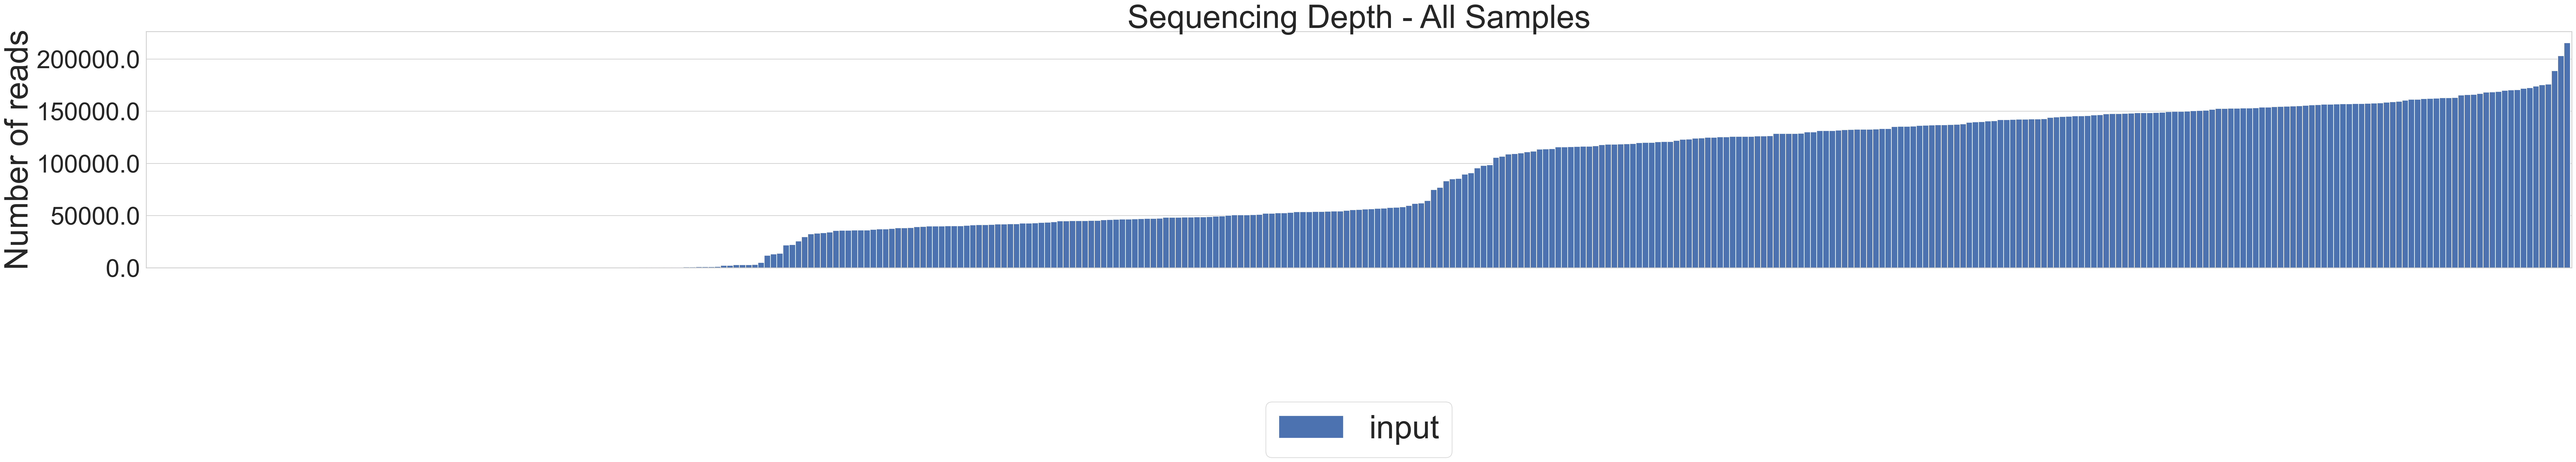

In [28]:
plot_depth(df_reads['input'],"All Samples","Number of reads","output/img/num_reads_all")

In [29]:
read_stat=[df_reads['input'].mean(),df_reads['input'].min(),df_reads['input'].max()]
read_stat

[77915.22879177378, 1, 215575]

In [30]:
col_add = ['input','filtered','denoised','merged','non-chimeric']
for i in col_add:
    m_save[i] = df_reads[i]

In [31]:
m_save.shape

(389, 19)

<h3 id="4.3&nbsp;&nbsp;QIIME-filtering">4.3&nbsp;&nbsp;QIIME filtering</h3>

Per-sample read depths at each filtering step are recorded in `denoising/stats/<runID>.qzv`.  The plots below show the mean for each category; error bars indicate the 95% confidence interval.  

These filtering steps include:

- filter: sequences are filtered based on Q score (default is 4)
- denoise: 
- unpaired: paired-end sequences that are unable to be merged, either because the sequences are too short and do not overlap, or because the ends do not align;
- non-chimeric: sequences that are chimeric are fitered;

Blanks (ext_blanks, seq_blanks) should have signficantly lower reads than artifical colonies (art_col, Zymobiomics, MSA), which would both have lower reads than study samples (human_1, biocollective, robogut). Additionally, blanks were sub-divided further, as NTC blanks are expected to have near-zero read depths, and represent false positives introduced by sequencing reagents.
PCR blanks and Extraction blanks are expected to have read depths that are at least one to two orders of magnitude lower than the average study sample depth.  They represent the relatively low level of taxa that may be detected in the water, or other reagents used in the lab.

In [32]:
#determine which samples have 0 reads at start
if(len(m_save[m_save['input']==0])!=0):
    metacount_all(m_save[m_save['input']==0])
else:
    print("No samples meet metric")

No samples meet metric


In [33]:
#determine which samples have 0 reads after filtering
if(len(m_save[m_save['filtered']==0])!=0):
    metacount_all(m_save[m_save['filtered']==0])
else:
    print("No samples meet metric")

Number of samples
Source-PCR-Plate                   
PC04925                           1

Number of samples
Run-ID                   
Run2                    1

Number of samples
CGR-Sample-ID                   
SC249364                       1

Number of samples
Sample-Type                   
Study                        1

Number of samples
Sample-Des                   
human_1                     1

Number of samples
Subject-ID                   
human_1                     1

Number of samples
Reciept                           
sFEMB-001-R-002                  1

Number of samples
Ext-Company                   
Qiagen                       1

Number of samples
Ext-Kit                     
DSP Virus                  1

Number of samples
Ext-Robotics                   
QIASymphony                   1

Number of samples
Homo-Status                   
Standard                     1

Number of samples
Homo-Method                   
Vertical                     1

Number of samples
Homo-Holder                   
Tubes                        1

Number of samples
input                   
15                     1

Number of samples
filtered                   
0                         1

Number of samples
denoised                   
0                         1

Number of samples
merged                   
0                       1

Number of samples
non-chimeric                   
0                             1

In [34]:
#determine which samples have 0 reads after denoising
rm = m_save[(m_save['denoised']==0) & (m_save['filtered']!=0)]
if(len(rm)):
    metacount_all(rm)
else:
    print("No samples meet metric")

No samples meet metric


In [35]:
#determine which samples have 0 reads after unpaired
rm = m_save[(m_save['merged']==0) &(m_save['denoised']!=0) & (m_save['filtered']!=0)]

if(len(rm)):
    metacount_all(rm)
    display(rm.shape)
else:
    print("No samples meet metric")

Number of samples
Source-PCR-Plate                   
PC22190                           7
PC04924                           7
PC22192                           5
PC04925                           4
PC07578                           3

Number of samples
Run-ID                   
Run4                   12
Run1                    7
Run2                    4
Run3                    3

Number of samples
CGR-Sample-ID                        
SC249361                            2
SC249359                            2
SC249369                            2
SC253852                            2
SC553058                            1
NTC-PC22192-D-12                    1
SC553059                            1
SC553018                            1
SC249392                            1
SC553088                            1
SC249384                            1
Water-PC22192-C-12                  1
SC249389                            1
NTC-PC04924-H-12                    1
SC553023                            1
SC553028                            1
SC553092                            1
SC552985                            1
SC553081                            1
SC253849                            1
SC249386                            1
SC553017                            1

Number of samples
Sample-Type                   
Study                       18
Ext_Control                  5
Seq_Control                  3

Number of samples
Sample-Des                    
human_1                     18
Seq_Blank                    3
ZymoBiomics                  3
Ext_Blank                    2

Number of samples
Subject-ID                   
human_1                    18
D6310                       3
NTC_Blank                   2
Water                       2
PCR_Blank                   1

Number of samples
Reciept                           
sFEMB-001-R-002                  6
sFEMB-001-R-003                  4
sFEMB-001-R-011                  3
sFEMB-001-R-042                  2
sFEMB-001-R-049                  2
sFEMB-001-R-041                  2
sFEMB-001-R-052                  1
sFEMB-001-R-055                  1
sFEMB-001-R-039                  1
sFEMB-001-R-054                  1

Number of samples
Ext-Company                    
Qiagen                       11
ZymoResearch                  9
ThermoFisher                  3

Number of samples
Ext-Kit                                          
96 MagBead DNA Extraction Kit                   9
DSP Virus                                       9
MagMax Microbiome Ultra Kit                     3
MagAttract PowerMicrobiome Kit                  1
DNeasy PowerSoil Pro kit                        1

Number of samples
Ext-Robotics                   
None                         10
QIASymphony                   9
KingFisher                    4

Number of samples
Homo-Status                   
Standard                    17
Covaris                      3
SPEX                         2
Altered                      1

Number of samples
Homo-Method                     
Vertical                      12
Plate Adaptor                  4
AFA                            3
SPEX                           2
TissueLyzer                    2

Number of samples
Homo-Holder                   
Tubes                       15
Plate                        8

Number of samples
input                   
21                     3
22                     2
19                     2
18                     2
26                     1
36                     1
34                     1
46                     1
25                     1
5                      1
38                     1
7                      1
12                     1
10                     1
11                     1
57                     1
14                     1
15                     1
16                     1
17                     1
1                      1

Number of samples
filtered                   
17                        3
6                         3
21                        2
18                        2
13                        2
12                        2
11                        2
7                         2
30                        1
29                        1
22                        1
19                        1
15                        1
14                        1
3                         1
1                         1

Number of samples
denoised                   
17                        3
6                         3
21                        2
18                        2
13                        2
12                        2
11                        2
7                         2
30                        1
29                        1
22                        1
19                        1
15                        1
14                        1
3                         1
1                         1

Number of samples
merged                   
0                      26

Number of samples
non-chimeric                   
0                            26

(26, 19)

In [36]:
#determine which samples have 0 reads after chimeria
rm = m_save[(m_save['non-chimeric']==0) & (m_save['merged']!=0) &(m_save['denoised']!=0) & (m_save['filtered']!=0)]
if(len(rm)):
    metacount_all(rm)
    display(rm.shape)
else:
    print("No samples meet metric")

Number of samples
Source-PCR-Plate                   
PC22192                           1

Number of samples
Run-ID                   
Run4                    1

Number of samples
CGR-Sample-ID                   
SC553064                       1

Number of samples
Sample-Type                   
Ext_Control                  1

Number of samples
Sample-Des                   
Ext_Blank                   1

Number of samples
Subject-ID                   
Water                       1

Number of samples
Reciept                           
sFEMB-001-R-050                  1

Number of samples
Ext-Company                    
ThermoFisher                  1

Number of samples
Ext-Kit                                       
MagMax Microbiome Ultra Kit                  1

Number of samples
Ext-Robotics                   
KingFisher                    1

Number of samples
Homo-Status                   
SPEX                         1

Number of samples
Homo-Method                   
SPEX                         1

Number of samples
Homo-Holder                   
Plate                        1

Number of samples
input                   
507                    1

Number of samples
filtered                   
4                         1

Number of samples
denoised                   
4                         1

Number of samples
merged                   
4                       1

Number of samples
non-chimeric                   
0                             1

(1, 19)

In [37]:
#remove all samples from df
df_reads_clean = m_save[m_save['non-chimeric']!=0]
df_reads_clean.shape

(361, 19)

In [38]:
m_save = df_reads_clean.copy()

In [39]:
metacount_all(m_save)

Number of samples
Source-PCR-Plate                   
PC04924                          78
PC04925                          74
PC07578                          71
PC22192                          69
PC22190                          69

Number of samples
Run-ID                   
Run4                  138
Run1                   78
Run2                   74
Run3                   71

Number of samples
CGR-Sample-ID                   
SC249448                       4
SC249426                       3
SC249411                       3
SC249441                       3
SC249430                       3
...                          ...
SC553036                       1
SC502445                       1
SC502442                       1
SC304097                       1
SC552969                       1

[279 rows x 1 columns]

Number of samples
Sample-Type                   
Ext_Control                161
Study                      161
Seq_Control                 39

Number of samples
Sample-Des                    
human_1                    112
ZymoBiomics                 88
Ext_Blank                   55
Robogut                     49
art_col                     30
MSA                         20
Seq_Blank                    7

Number of samples
Subject-ID                   
human_1                   112
D6300                      57
Water                      55
DZ35298                    49
DZ35322                    25
D6310                      19
MSA1001                     5
DZ35316                     5
MSA1002                     5
D6305                       5
MSA1003                     5
D6306                       5
MSA1000                     5
PCR_Blank                   4
NTC_Blank                   3
D6311                       2

Number of samples
Reciept                           
sFEMB-001-R-007                 26
sFEMB-001-R-006                 23
sFEMB-001-R-008                 22
sFEMB-001-R-010                 21
sFEMB-001-R-005                 21
sFEMB-001-R-011                 18
sFEMB-001-R-009                 18
sFEMB-001-R-002                 17
sFEMB-001-R-034                 16
sFEMB-001-R-003                 14
sFEMB-001-R-052                 13
sFEMB-001-R-016                 10
sFEMB-001-R-015                 10
sFEMB-001-R-040                  9
sFEMB-001-R-038                  9
sFEMB-001-R-039                  9
sFEMB-001-R-037                  9
sFEMB-001-R-042                  7
sFEMB-001-R-041                  7
sFEMB-001-R-047                  4
sFEMB-001-R-045                  4
sFEMB-001-R-043                  4
sFEMB-001-R-048                  4
sFEMB-001-R-046                  4
sFEMB-001-R-053                  4
sFEMB-001-R-051                  4
sFEMB-001-R-044                  4
sFEMB-001-R-055                  3
sFEMB-001-R-050                  3
sFEMB-001-R-054                  3
sFEMB-001-R-049                  2

Number of samples
Ext-Company                    
Qiagen                      259
ZymoResearch                 50
ThermoFisher                 13

Number of samples
Ext-Kit                                          
MagAttract PowerMicrobiome Kit                 74
MagAttract PowerSoil DNA Kit                   74
96 MagBead DNA Extraction Kit                  50
QIAamp with Modifications                      39
DNeasy PowerSoil Pro kit                       37
DSP Virus                                      35
MagMax Microbiome Ultra Kit                    13

Number of samples
Ext-Robotics                   
KingFisher                  161
None                        110
QIASymphony                  35
QIACube HT                   16

Number of samples
Homo-Status                   
Standard                   232
Altered                     34
Covaris                     27
SPEX                        21
Horizontal                   8

Number of samples
Homo-Method                     
TissueLyzer                  126
Vertical                     126
AFA                           27
SPEX                          21
Plate Adaptor                 14
Horizontal                     8

Number of samples
Homo-Holder                   
Tubes                      165
Plate                      157

Number of samples
input                    
4                       2
67                      2
24                      2
30                      2
63                      2
...                   ...
2883                    1
152901                  1
330                     1
158539                  1
91                      1

[356 rows x 1 columns]

Number of samples
filtered                   
21                        3
13                        3
38                        2
1                         2
40                        2
...                     ...
49651                     1
89410                     1
58180                     1
134982                    1
41984                     1

[348 rows x 1 columns]

Number of samples
denoised                   
21                        3
13                        3
38                        2
1                         2
40                        2
...                     ...
49651                     1
89410                     1
58180                     1
134982                    1
41984                     1

[348 rows x 1 columns]

Number of samples
merged                   
3                       4
13                      3
27                      2
2                       2
83                      2
...                   ...
111430                  1
112455                  1
86856                   1
36                      1
115712                  1

[349 rows x 1 columns]

Number of samples
non-chimeric                   
3                             4
13                            3
27                            2
2                             2
98842                         2
...                         ...
90064                         1
36684                         1
77041                         1
49999                         1
92672                         1

[347 rows x 1 columns]

<h4 id="4.3.2&nbsp;&nbsp;Non-bacterial Reads">4.3.2&nbsp;&nbsp;Non-bacterial Reads</h4>
Reads are being classified using a database of predominantly bacterial sequences, so human reads, for example, will generally be in the "Unclassified" category rather than "Eukaryota."  Non-bacterial reads can indicate host (human) or other contamination. This can be helpful with troubleshooting if some samples unexpectedly have a high proportion of non-bacterial OTU's. Samples with > 10% non-bacterial OTU's were filtered.

In [40]:
%cd {proj_dir}
#!unzip -q -d rpt_silva 'barplots_classify-sklearn_silva-132-99-nb-classifier.qzv'

C:\Users\slsevilla\Google Drive\MyDocuments_Current\Education\George Mason University\Dissertation\Data\Aim1


In [41]:
def read_in_tax(level):
    f = glob.glob('output/taxonomic_classification/rpt_silva/*/data/level-'+level+'.csv')
    df = pd.read_csv(f[0])
    df = df.rename(columns = {'index':'Sample'})
    df = df.set_index('Sample')  
    return df

In [42]:
def plot_abund(df,label,y_title,file_save):
    plt.figure(dpi=200)
    pal = sns.color_palette("Accent")
    ax = df.sort_values('D_0__Bacteria').plot.bar(stacked=True, color=pal, figsize=(70,7), width=1, edgecolor='white', ax=plt.gca())
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),ncol=4,fontsize=52)
    ax.set_ylabel(y_title,fontsize=52)
    ax.axes.get_xaxis().set_ticks([])
    ax.set_title('Taxonomic classification - '+label,fontsize=52)
    ax.set_yticklabels(ax.get_yticks(), size = 40)
    plt.savefig(file_save+'.png',bbox_inches="tight")  
    plt.show()    

In [43]:
df_l1 = read_in_tax("1") #Read in taxonomy at kingdom

In [44]:
#subset df to current samp list
samp_list = m_save.index
df_l1_clean = df_l1[~df_l1.index.isin(samp_list)==False]
df_l1_clean.shape

(361, 18)

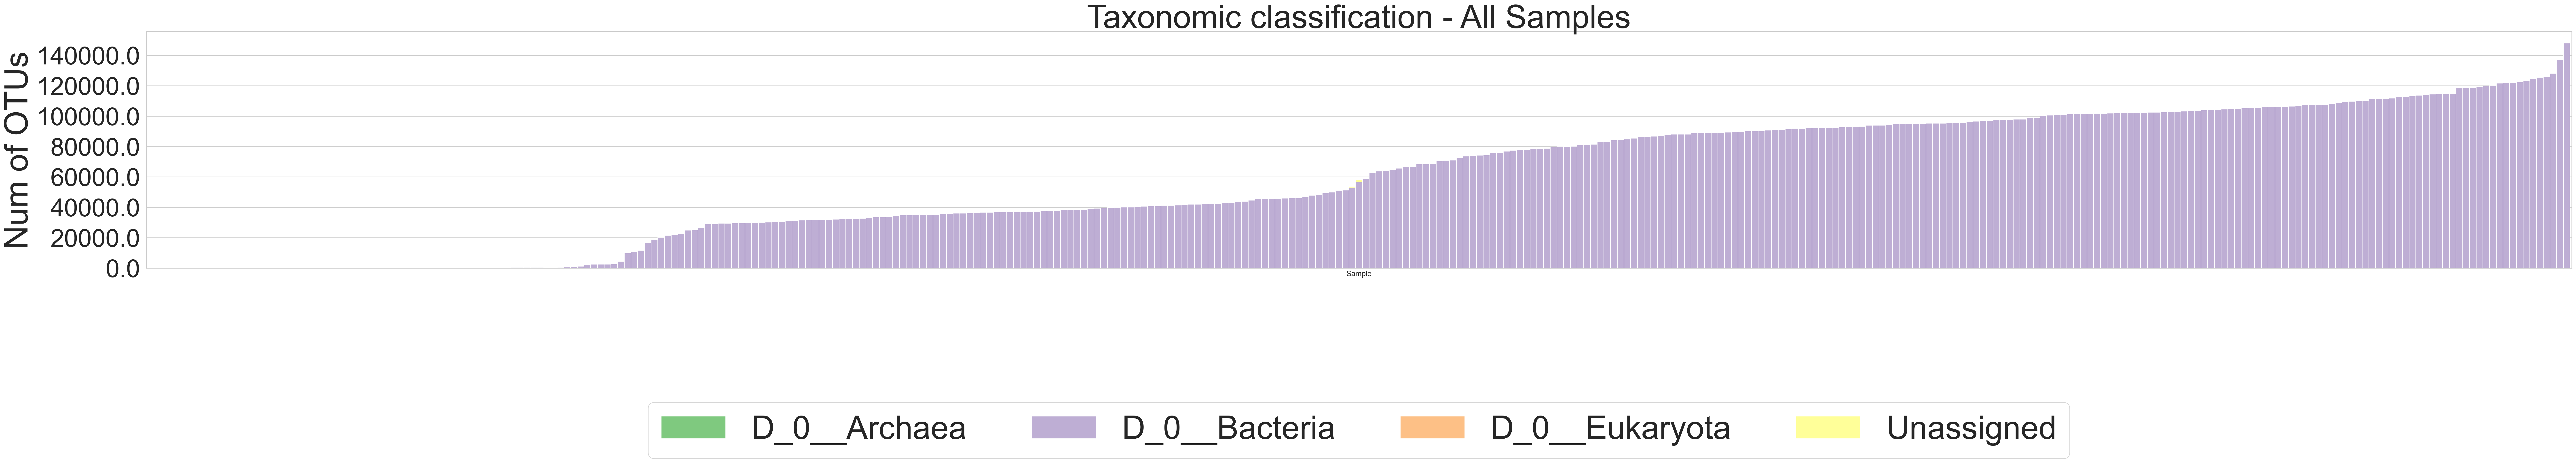

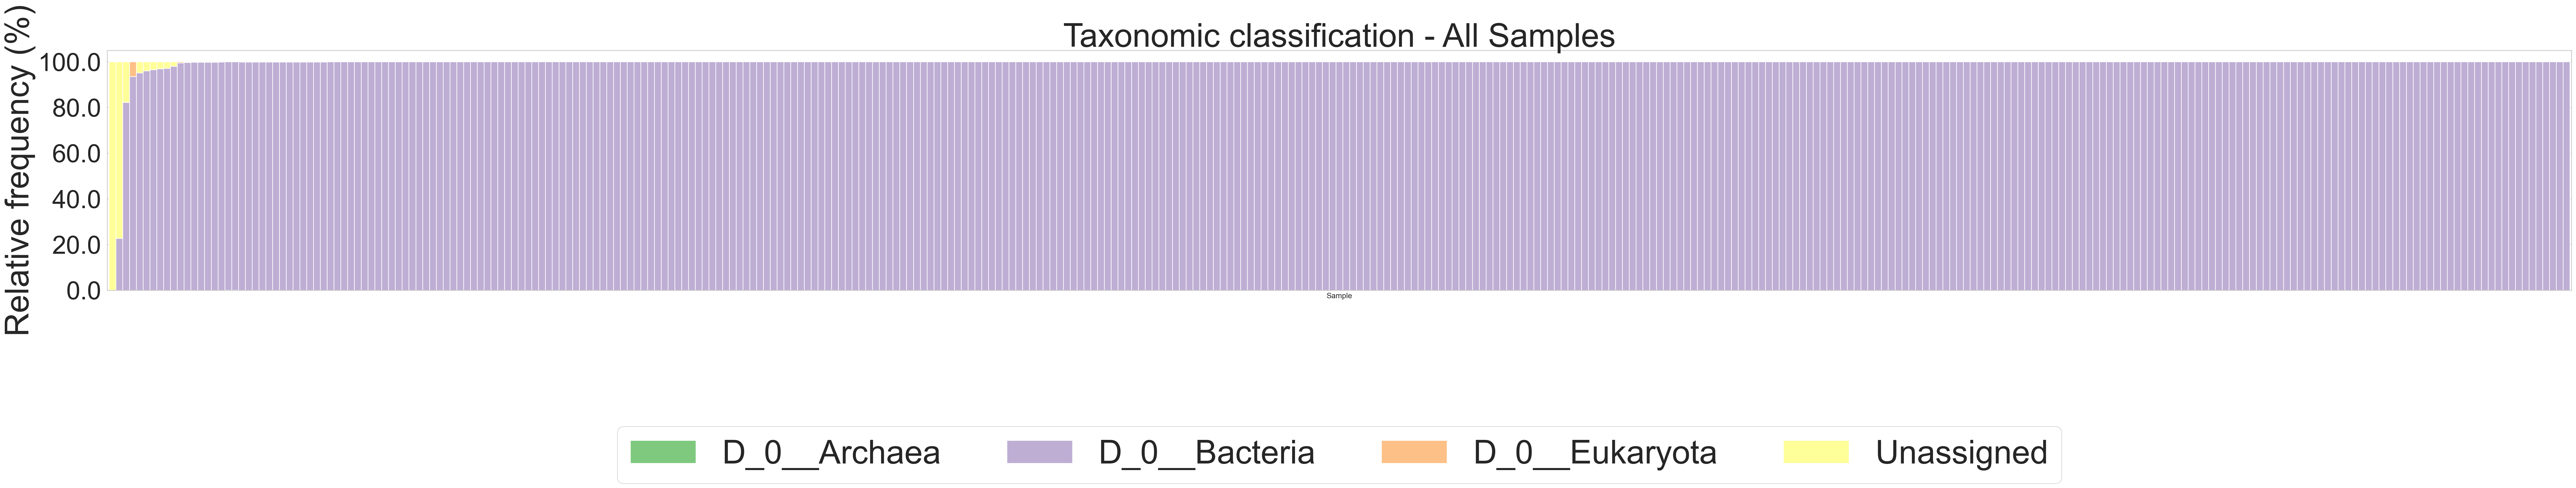

In [45]:
df_l1_abund = df_l1_clean.select_dtypes(['number']).dropna(axis=1, how='all')  
plot_abund(df_l1_abund,'All Samples','Num of OTUs','output/img/abs_l1_all')

df_l1_rel = df_l1_abund.div(df_l1_abund.sum(axis=1), axis=0) * 100 #axis=1 is along row
plot_abund(df_l1_rel,'All Samples','Relative frequency (%)','output/img/rel_l1_all')

In [46]:
df_l1_rel.sort_values('D_0__Bacteria').head(20)

D_0__Archaea  D_0__Bacteria  D_0__Eukaryota  Unassigned
Sample                                                                        
Water-PC04925-G-12         0.000000       0.000000        0.000000  100.000000
Water-PC04924-G-12         0.000000      22.727273        0.000000   77.272727
SC249423                   0.000000      82.208589        0.000000   17.791411
NTC-PC07578-H-12           0.000000      93.548387        6.451613    0.000000
SC249450                   0.000000      95.129376        0.000000    4.870624
SC249367                   0.000000      96.078431        0.000000    3.921569
SC304925-PC07578-B-08      0.000000      96.517413        0.000000    3.482587
SC253202-PC04925-F-08      0.000000      96.908397        0.000000    3.091603
SC249358                   0.000000      97.120661        0.000000    2.879339
SC249415                   0.000000      98.004895        0.000000    1.995105
SC555340                   0.000000      99.513600        0.486400    0.000000
SC249433-PC04924-B-08      0.000000      99.660101        0.000000    0.339899
SC555344                   0.000000      99.764008        0.235992    0.000000
SC555345                   0.000000      99.837123        0.162877    0.000000
SC284735                   0.000000      99.852333        0.140010    0.007657
SC249410-PC04925-F-02      0.000000      99.853438        0.000000    0.146562
SC284734                   0.000000      99.877796        0.122204    0.000000
SC552995                   0.113243      99.886757        0.000000    0.000000
SC553053                   0.111452      99.888548        0.000000    0.000000
SC249422-PC04925-D-03      0.000000      99.890086        0.000000    0.109914

In [47]:
df_l1_rel[df_l1_rel['D_0__Bacteria']>99].count()

D_0__Archaea      351
D_0__Bacteria     351
D_0__Eukaryota    351
Unassigned        351
dtype: int64

In [48]:
#remove samps with <99% bact
df_l1_rel_clean = df_l1_rel[df_l1_rel.index.isin(m_save.index)]
if len(df_l1_rel_clean[(df_l1_rel_clean['D_0__Bacteria'] <99)]>0):
    df_l1_drop_list = df_l1_rel_clean[(df_l1_rel['D_0__Bacteria'] <99)].index
    m_bac90_rm = m_save[~m_save.index.isin(df_l1_drop_list) == False]
    m_bac90_rm.to_csv(r'manifest/m_90bact_rm.txt',header = m_bac90_rm.columns,index = False, sep='\t')
    
    m_bac90 = m_save[m_save.index.isin(df_l1_drop_list) == False]
    m_bac90.to_csv(r'manifest/m_90bact.txt',header = m_bac90.columns,index = True, sep='\t')
    display(df_l1_rel_clean[(df_l1_rel_clean['D_0__Bacteria'] <99)])
else:
    print ("all are above 90")
    display(df_l1_rel_clean.sort_values(by=['Unassigned']).tail())

D_0__Archaea  D_0__Bacteria  D_0__Eukaryota  Unassigned
Sample                                                                        
SC253202-PC04925-F-08           0.0      96.908397        0.000000    3.091603
Water-PC04925-G-12              0.0       0.000000        0.000000  100.000000
NTC-PC07578-H-12                0.0      93.548387        6.451613    0.000000
SC304925-PC07578-B-08           0.0      96.517413        0.000000    3.482587
SC249358                        0.0      97.120661        0.000000    2.879339
SC249367                        0.0      96.078431        0.000000    3.921569
SC249415                        0.0      98.004895        0.000000    1.995105
SC249423                        0.0      82.208589        0.000000   17.791411
SC249450                        0.0      95.129376        0.000000    4.870624
Water-PC04924-G-12              0.0      22.727273        0.000000   77.272727

In [49]:
metacount_all(m_bac90_rm)

Number of samples
Source-PCR-Plate                   
PC04924                           6
PC07578                           2
PC04925                           2

Number of samples
Run-ID                   
Run1                    6
Run3                    2
Run2                    2

Number of samples
CGR-Sample-ID                        
SC249450                            1
NTC-PC07578-H-12                    1
Water-PC04924-G-12                  1
SC249423                            1
Water-PC04925-G-12                  1
SC249367                            1
SC253202                            1
SC304925                            1
SC249358                            1
SC249415                            1

Number of samples
Sample-Type                   
Ext_Control                  6
Seq_Control                  3
Study                        1

Number of samples
Sample-Des                   
Ext_Blank                   5
Seq_Blank                   3
human_1                     1
art_col                     1

Number of samples
Subject-ID                   
Water                       5
PCR_Blank                   2
NTC_Blank                   1
DZ35322                     1
human_1                     1

Number of samples
Reciept                           
sFEMB-001-R-002                  2
sFEMB-001-R-010                  1
sFEMB-001-R-005                  1
sFEMB-001-R-008                  1
sFEMB-001-R-016                  1
sFEMB-001-R-006                  1

Number of samples
Ext-Company                    
Qiagen                        6
ZymoResearch                  1

Number of samples
Ext-Kit                                          
DSP Virus                                       2
MagAttract PowerSoil DNA Kit                    2
MagAttract PowerMicrobiome Kit                  1
96 MagBead DNA Extraction Kit                   1
QIAamp with Modifications                       1

Number of samples
Ext-Robotics                   
KingFisher                    3
QIASymphony                   2
None                          2

Number of samples
Homo-Status                   
Standard                     7

Number of samples
Homo-Method                   
Vertical                     4
TissueLyzer                  3

Number of samples
Homo-Holder                   
Tubes                        4
Plate                        3

Number of samples
input                   
303                    1
205                    1
460                    1
1080                   1
74823                  1
70                     1
2341                   1
89727                  1
3235                   1
962                    1

Number of samples
filtered                   
799                       1
61850                     1
1633                      1
122                       1
680                       1
135                       1
22                        1
56179                     1
2722                      1
243                       1

Number of samples
denoised                   
799                       1
61850                     1
1633                      1
122                       1
680                       1
135                       1
22                        1
56179                     1
2722                      1
243                       1

Number of samples
merged                   
110                     1
93                      1
2620                    1
603                     1
58682                   1
1314                    1
22                      1
612                     1
163                     1
54242                   1

Number of samples
non-chimeric                   
110                           1
93                            1
53932                         1
603                           1
2620                          1
58312                         1
22                            1
612                           1
163                           1
1314                          1

In [50]:
m_bac90.shape

(351, 19)

In [51]:
m_save = m_bac90.copy()
m_save.shape

(351, 19)

In [52]:
m_save.head()

Source-PCR-Plate Run-ID  Project-ID CGR-Sample-ID  Sample-Type  \
Sample ID                                                                  
SC284724           PC04924   Run1  NP0084-MB4      SC284724  Seq_Control   
SC284725           PC04924   Run1  NP0084-MB4      SC284725  Seq_Control   
SC284726           PC04924   Run1  NP0084-MB4      SC284726  Seq_Control   
SC284727           PC04924   Run1  NP0084-MB4      SC284727  Seq_Control   
SC284730           PC04925   Run2  NP0084-MB4      SC284730  Seq_Control   

          Sample-Des Subject-ID Reciept Ext-Company Ext-Kit Ext-Robotics  \
Sample ID                                                                  
SC284724         MSA    MSA1000     NaN         NaN     NaN          NaN   
SC284725         MSA    MSA1001     NaN         NaN     NaN          NaN   
SC284726         MSA    MSA1002     NaN         NaN     NaN          NaN   
SC284727         MSA    MSA1003     NaN         NaN     NaN          NaN   
SC284730         MSA    MSA1000     NaN         NaN     NaN          NaN   

          Homo-Status Homo-Method Homo-Holder   input  filtered  denoised  \
Sample ID                                                                   
SC284724          NaN         NaN         NaN  156844    117368    117368   
SC284725          NaN         NaN         NaN  128819     98888     98888   
SC284726          NaN         NaN         NaN  166125    115152    115152   
SC284727          NaN         NaN         NaN  146609     93934     93934   
SC284730          NaN         NaN         NaN  162325    146316    146316   

           merged  non-chimeric  
Sample ID                        
SC284724   108161         94113  
SC284725    93463         81631  
SC284726   105007         95010  
SC284727    80002         70921  
SC284730   142828        121737

In [53]:
king_list = ['D_0__Archaea','D_0__Bacteria','D_0__Eukaryota','Unassigned']
for i in king_list:
    m_save[i] = df_l1[i]


<h4 id="4.3.3&nbsp;&nbsp;By flowcell">4.3.3&nbsp;&nbsp;By flowcell</h4>

In [54]:
#Plot fig with all samples
def plot_depth(df_in):
    plt.figure(dpi=100)
    sns.set(style="whitegrid")
    ax = sns.boxplot(x="Run-ID",y="input",data=df_in)
    ax.set_xlabel('Flowcell ID')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")#,fontsize=8)
    ax.axes.set_title("Sequencing depth distribution per flow cell - All samples",fontsize=12)
    plt.savefig('output/img/seq_depth_uneven.png',bbox_inches="tight")  
    plt.show()

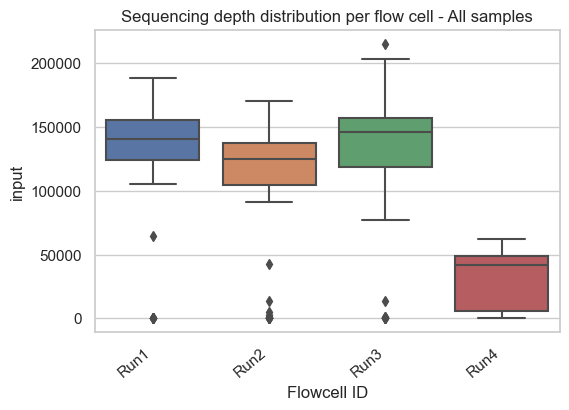

In [55]:
plot_depth(m_save)

In [56]:
metacount_run_sub(m_save) #Check if blanks are even amongst all samples

Subject-ID       0           1
Run-ID Subject-ID                                
Run1   D6300               14  Run-ID  Subject-ID
       D6305                1  Run-ID  Subject-ID
       D6306                1  Run-ID  Subject-ID
       DZ35298             14  Run-ID  Subject-ID
       DZ35322             13  Run-ID  Subject-ID
       MSA1000              1  Run-ID  Subject-ID
       MSA1001              1  Run-ID  Subject-ID
       MSA1002              1  Run-ID  Subject-ID
       MSA1003              1  Run-ID  Subject-ID
       Water                3  Run-ID  Subject-ID
       human_1             22  Run-ID  Subject-ID
Run2   D6300                8  Run-ID  Subject-ID
       D6305                1  Run-ID  Subject-ID
       D6306                1  Run-ID  Subject-ID
       DZ35298             12  Run-ID  Subject-ID
       DZ35322              4  Run-ID  Subject-ID
       MSA1000              1  Run-ID  Subject-ID
       MSA1001              1  Run-ID  Subject-ID
       MSA1002              1  Run-ID  Subject-ID
       MSA1003              1  Run-ID  Subject-ID
       NTC_Blank            1  Run-ID  Subject-ID
       Water                7  Run-ID  Subject-ID
       human_1             34  Run-ID  Subject-ID
Run3   D6300               14  Run-ID  Subject-ID
       D6305                1  Run-ID  Subject-ID
       D6306                1  Run-ID  Subject-ID
       DZ35298             16  Run-ID  Subject-ID
       DZ35322              5  Run-ID  Subject-ID
       MSA1000              1  Run-ID  Subject-ID
       MSA1001              1  Run-ID  Subject-ID
       MSA1002              1  Run-ID  Subject-ID
       MSA1003              1  Run-ID  Subject-ID
       PCR_Blank            1  Run-ID  Subject-ID
       Water                7  Run-ID  Subject-ID
       human_1             20  Run-ID  Subject-ID
Run4   D6300               21  Run-ID  Subject-ID
       D6305                2  Run-ID  Subject-ID
       D6306                2  Run-ID  Subject-ID
       D6310               19  Run-ID  Subject-ID
       D6311                2  Run-ID  Subject-ID
       DZ35298              7  Run-ID  Subject-ID
       DZ35316              5  Run-ID  Subject-ID
       DZ35322              2  Run-ID  Subject-ID
       MSA1000              2  Run-ID  Subject-ID
       MSA1001              2  Run-ID  Subject-ID
       MSA1002              2  Run-ID  Subject-ID
       MSA1003              2  Run-ID  Subject-ID
       NTC_Blank            1  Run-ID  Subject-ID
       PCR_Blank            1  Run-ID  Subject-ID
       Water               33  Run-ID  Subject-ID
       human_1             35  Run-ID  Subject-ID

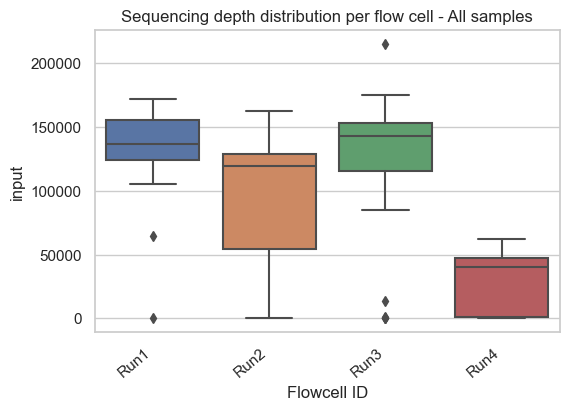

In [57]:
#Remove blanks, re-run and see if there is sig
search_values = ['Ext_Control','Seq_Control']
df_blanks = m_save[m_save['Sample-Type'].str.contains('|'.join(search_values ))]
drop_list = df_blanks.index

df_depth_no_blanks = m_save[~m_save.index.isin(drop_list) == False]
plot_depth(df_depth_no_blanks)

<h4 id="4.3.3&nbsp;&nbsp;By sample type">4.3.3&nbsp;&nbsp;By sample type</h4>

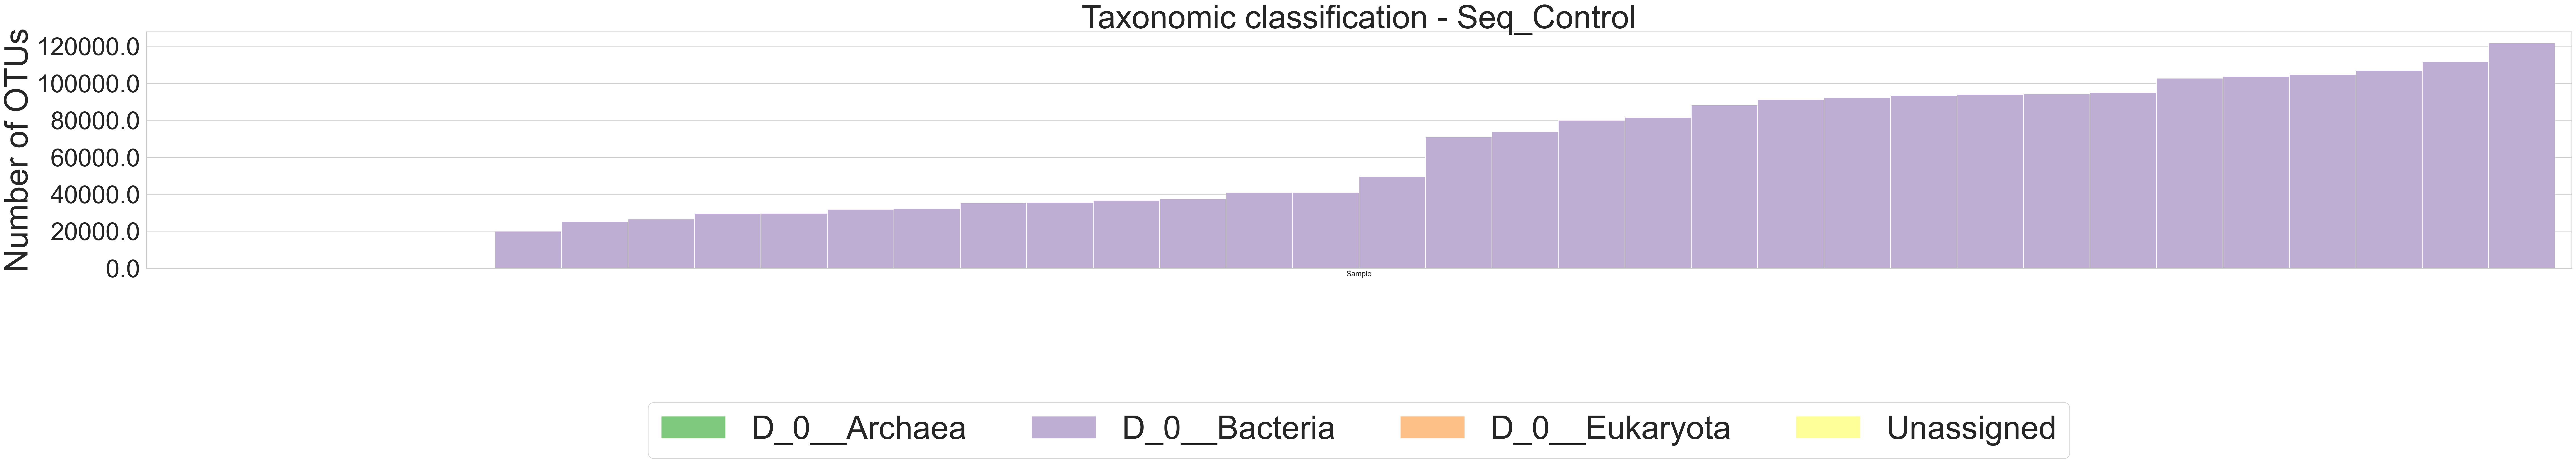

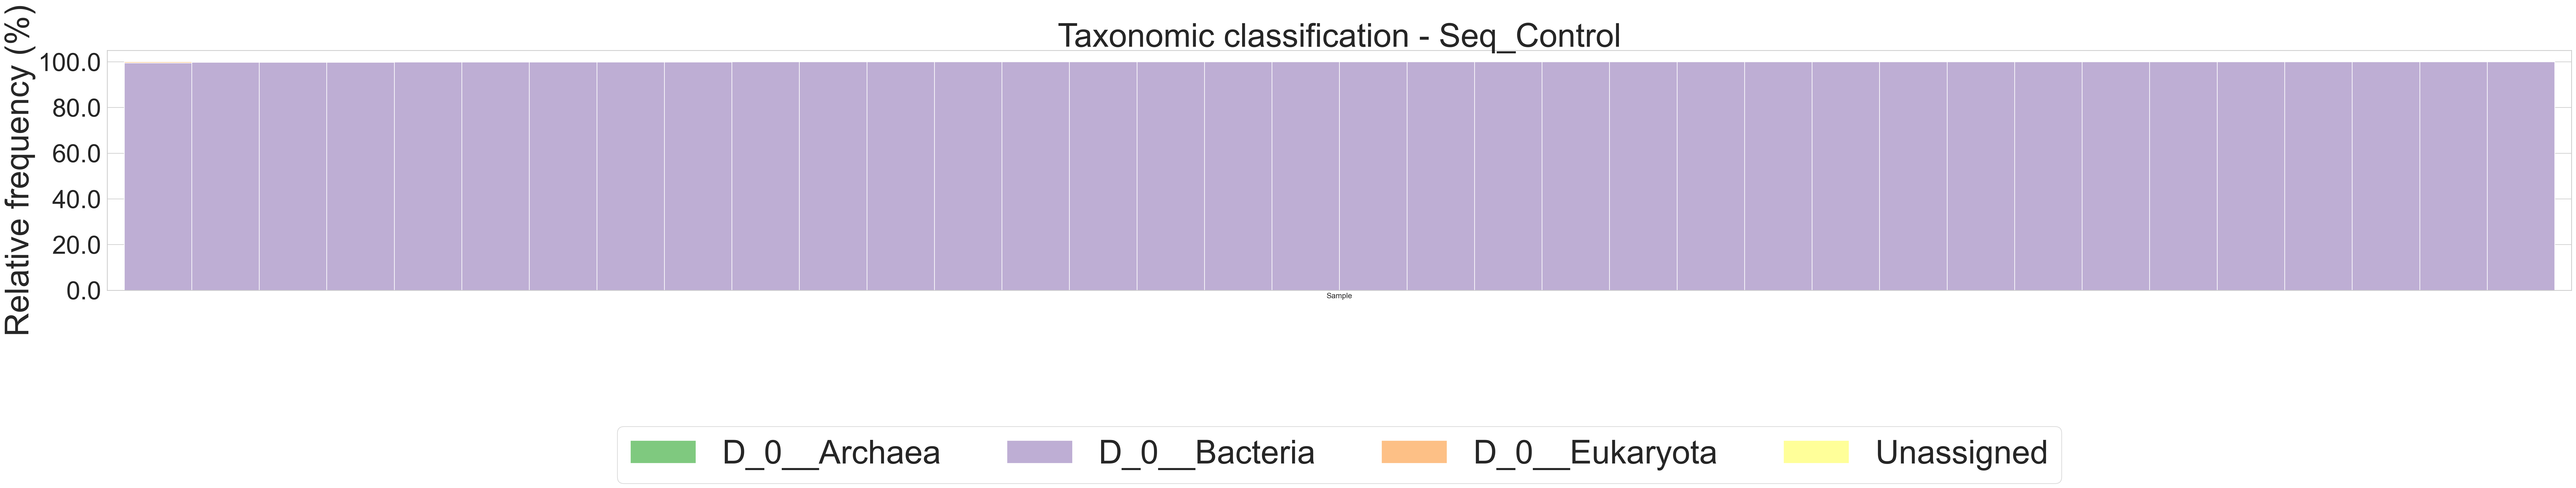

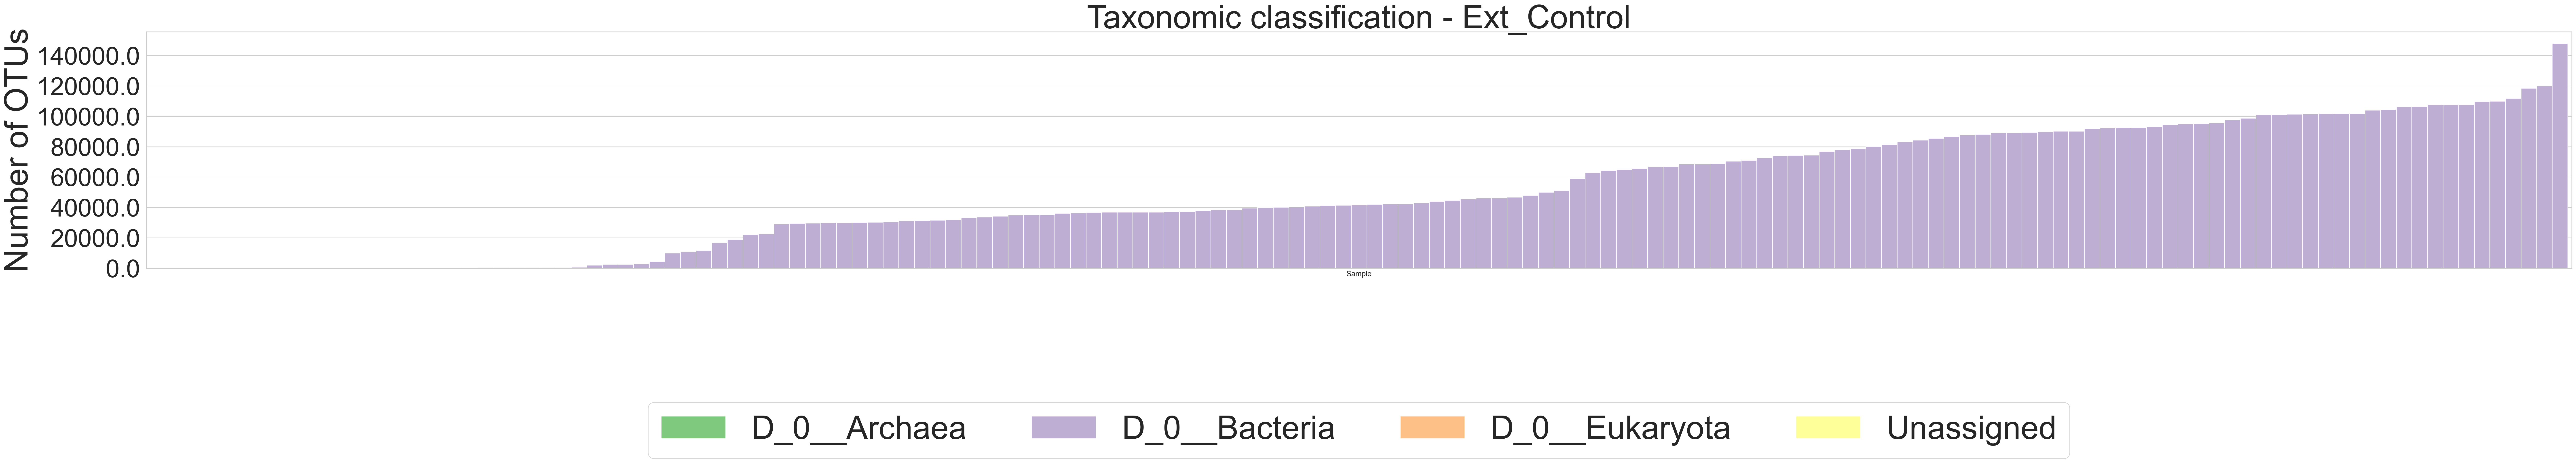

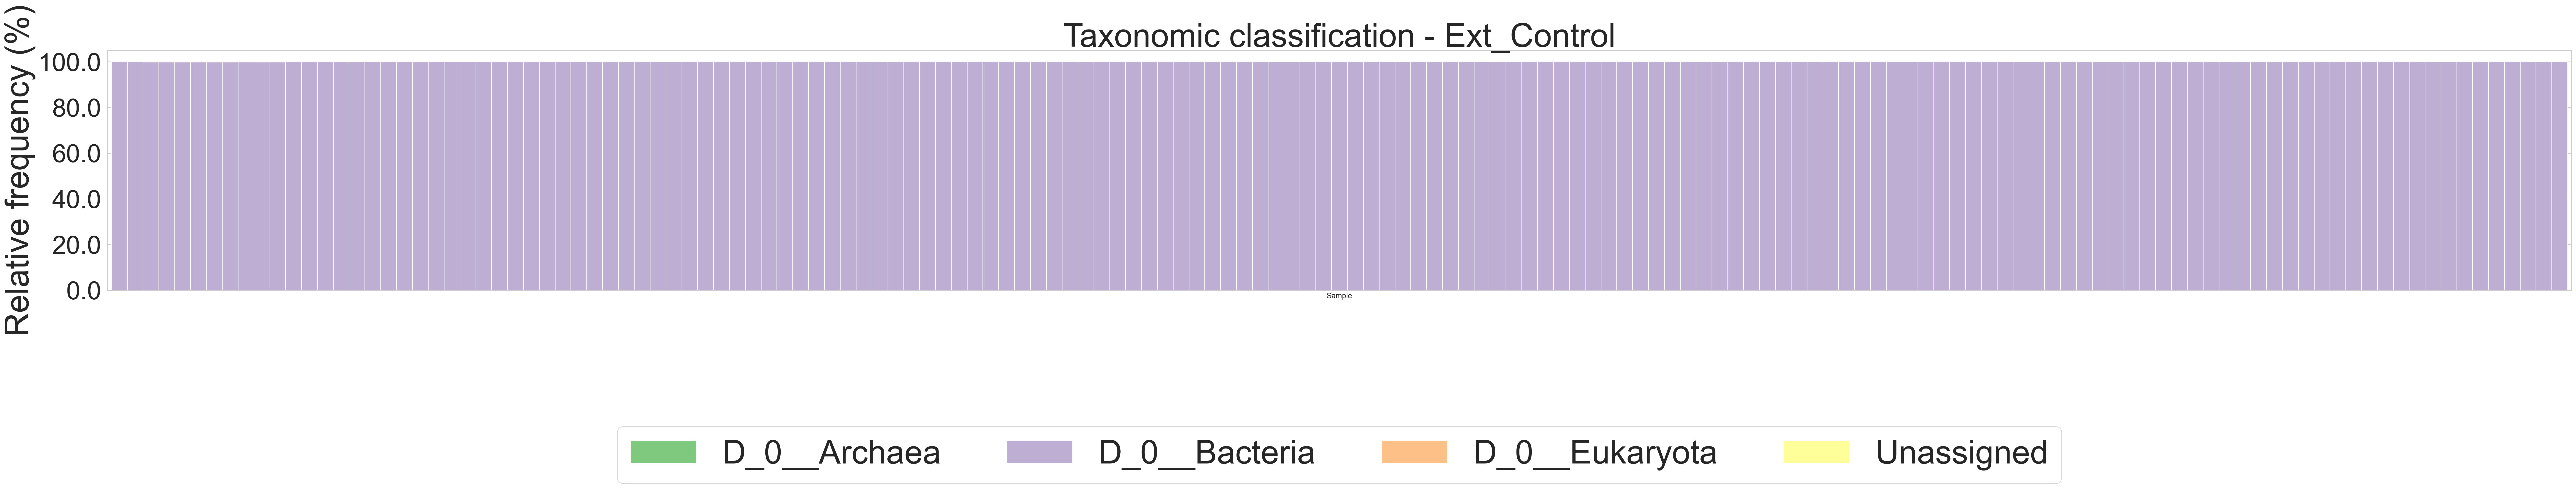

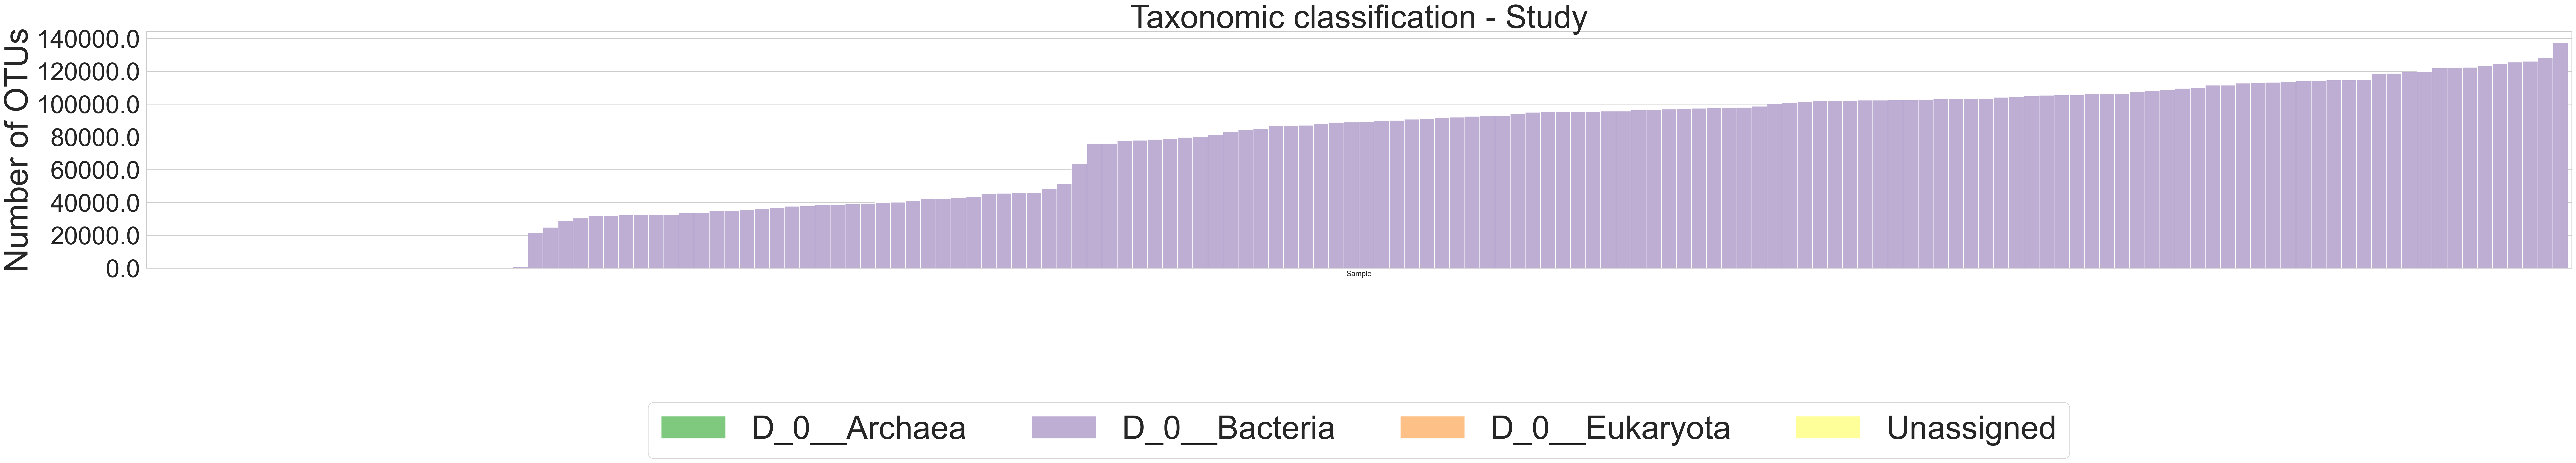

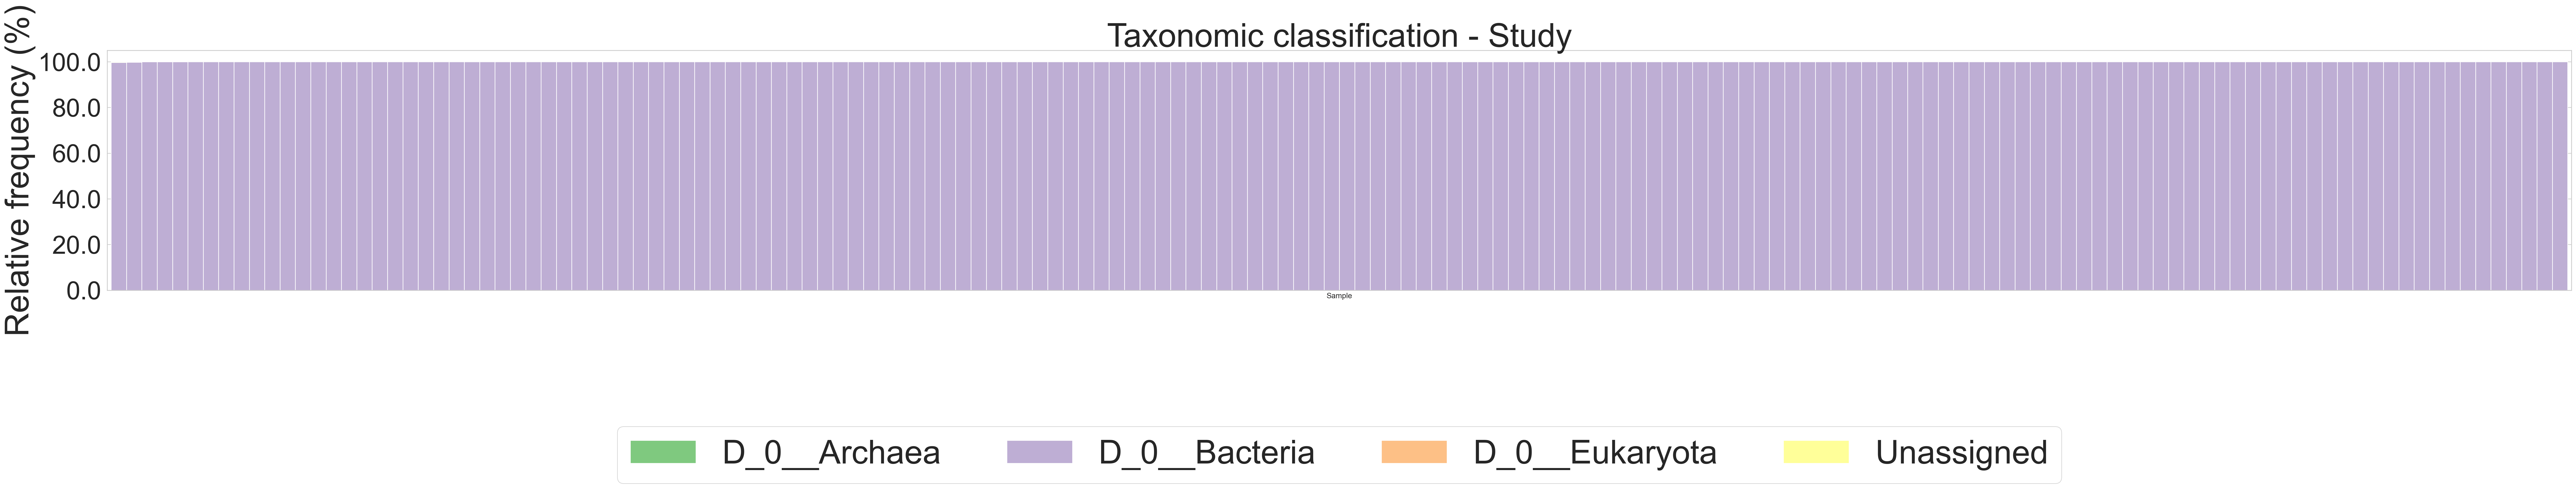

In [58]:
col_list = ['D_0__Archaea','D_0__Bacteria','D_0__Eukaryota','Unassigned']

for i in m_save['Sample-Type'].unique():
    drop_list = m_save[m_save['Sample-Type']==i].index
    df = df_l1[df_l1.index.isin(drop_list)==True]
    df = df[col_list].dropna(axis=1, how='all')  
    plot_abund(df,i,'Number of OTUs','output/img/abs_l1_'+i)
    df2 = df.div(df.sum(axis=1), axis=0) * 100 #axis=1 is along row
    plot_abund(df2,i,'Relative frequency (%)','output/img/rel_l1_'+i)

<h3 id="4.4&nbsp;&nbsp;Statistical differences">4.4&nbsp;&nbsp;Statistical differences</h3>

The Mann-Whitney U Test is a null hypothesis test, used to detect differences between two independent data sets. The test is specifically for non-parametric distributions, which do not assume a specific distribution for a set of data. Because of this, the Mann-Whitney U Test can be applied to any distribution, whether it is Gaussian or not.

Specifically, the null hypothesis of the Mann-Whitney U Test states that the distributions of two data sets are identical. If the null hypothesis is correct, there is a 50 percent chance that an arbitrarily selected value in one distribution is greater than another arbitrarily selected value in the second distribution (2).

The first output, the u-statistic, is defined in the previous section as the test statistic U for the Mann-Whitney U Test. The U-statistic is interpreted using a two-tailed test table, where the table contains critical values of U. To reject the null hypothesis at α=0.05, the U obtained from the test must be below the critical value of U found in the test table.

In [59]:
def mann_whitney_u_test(des1, des2, distribution_1, distribution_2):
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2, alternative='two-sided')
    pair = des1 + " vs " + des2
    return pair, u_statistic, p_value

In [60]:
def mann_whitt_sig(df_in,level,y_in):
    des_list = list(df_in[level].unique()) #create list of unique elements
    pair_list = list(combinations(des_list,2)) #create pair list for len of element list
    
    tmp = []
    for i in range(0,len(pair_list)): 
        des1 = pair_list[i][0]
        des2 = pair_list[i][1]
        tmp.append(mann_whitney_u_test(des1, des2, list(df_in[(df_in[level] == des1)][y_in]), list(df_in[(df_in[level] == des2)][y_in])))
    
    df = pd.DataFrame(tmp)
    df['sig'] = "nonsig"
    
    for i in df.index:
        if df.iloc[i][2] < 0.0001:
            df.at[i,'sig']= 'sig'
    df.columns = ["pair","u_stat","p_values","sig_.0001"]
    return df

<h4 id="4.4.1&nbsp;&nbsp;By sequence reads">4.4.1&nbsp;&nbsp;By sequence reads</h4>

In [61]:
df_mannwhit_stat = mann_whitt_sig(df_depth_no_blanks,'Run-ID','input')
print(df_mannwhit_stat)

           pair  u_stat      p_values sig_.0001
0  Run1 vs Run2   707.0  6.682469e-04    nonsig
1  Run1 vs Run3   620.0  7.593620e-01    nonsig
2  Run1 vs Run4  3372.0  4.562624e-17       sig
3  Run2 vs Run3   266.0  1.310187e-02    nonsig
4  Run2 vs Run4  2006.0  2.181333e-06       sig
5  Run3 vs Run4  2752.0  2.936957e-10       sig


In [62]:
def mann_whitt_plot_sig(df_in,x_filt_in,y_filt_in,order_in,pairs_in,filename):
    sns.set(style="whitegrid")
    df = sns.load_dataset("tips")

    x = x_filt_in
    y = y_filt_in
    order = order_in
    ax = sns.boxplot(data=df_in, x=x, y=y, order=order)
    add_stat_annotation(ax, data=df_in, x=x, y=y, order=order,
                        box_pairs=pairs_in,
                        test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
    plt.savefig('output/img/'+filename+'.png', dpi=300, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Run1 v.s. Run2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.009e-03 U_stat=7.070e+02
Run2 v.s. Run3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.861e-02 U_stat=2.660e+02
Run3 v.s. Run4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.762e-09 U_stat=2.752e+03
Run1 v.s. Run3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.200e+02
Run2 v.s. Run4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.309e-05 U_stat=2.006e+03
Run1 v.s. Run4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.738e-16 U_stat=3.372e+03


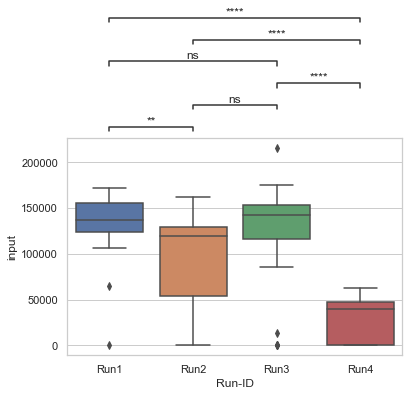

In [63]:
#Plot study samples for sig
list_order = list(df_depth_no_blanks["Run-ID"].unique()) #create list of unique elements
list_pairs = list(combinations(list_order,2)) #create pair list for len of element list

x_filt = "Run-ID"
y_filt = "input"
mann_whitt_plot_sig(df_depth_no_blanks,x_filt,y_filt,list_order,list_pairs,'mannwhitt_seqcount_study')

<h4 id="4.4.2&nbsp;&nbsp;By qiime2 filtering">4.4.1&nbsp;&nbsp;By qiime2 filtering</h4>

In [64]:
#Plots read counts for each level of filtering phases
def plot_read_counts(samples,pop):
    plt.figure(dpi=100)
    sns.set(style="whitegrid")
    ax = sns.barplot(data=df_stats[df_stats.index.isin(samples)]).set_title('Number of reads in ' + pop + ' samples')
    plt.savefig('output/img/filt_values_'+pop+'.png',bbox_inches="tight")  
    plt.show()

In [65]:
#subsets df by filter and calls plot_read_counts
def subplot_read_counts(df_in,sub_in):
    for i in df_in[sub_in].unique():
        l = list(df_in[df_in[sub_in].str.match(i)].index)
        plot_read_counts(l,i)

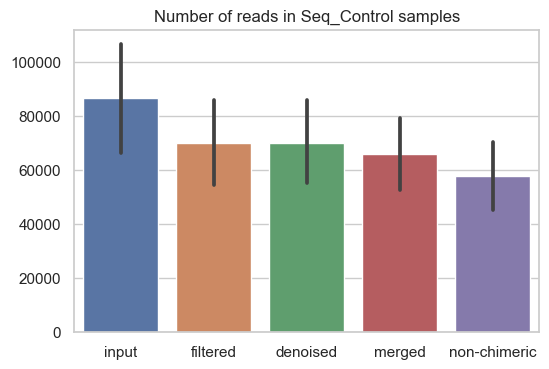

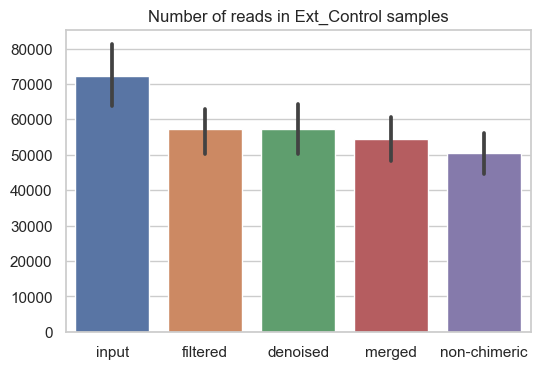

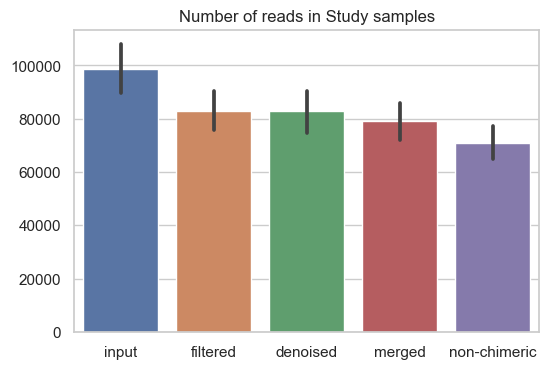

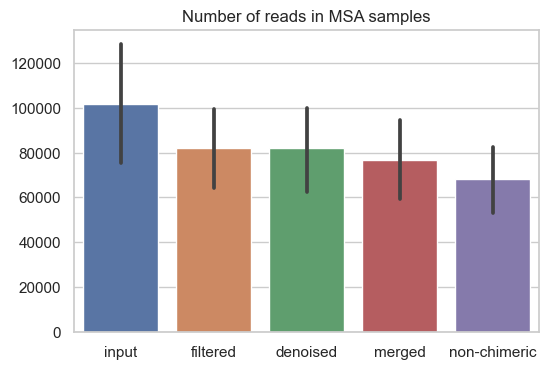

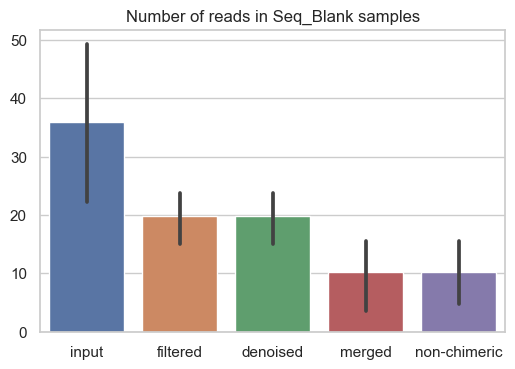

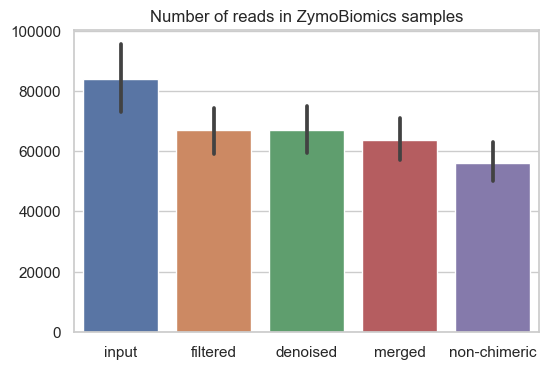

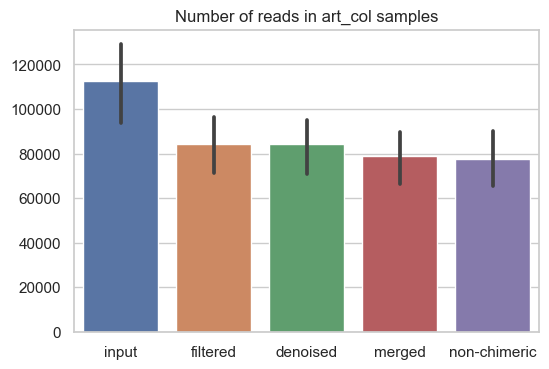

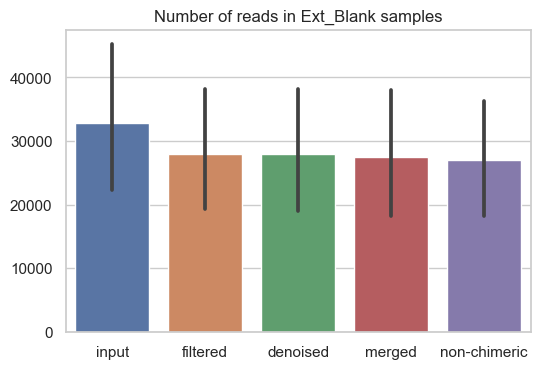

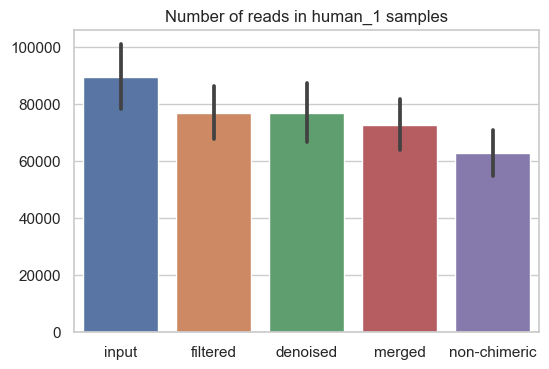

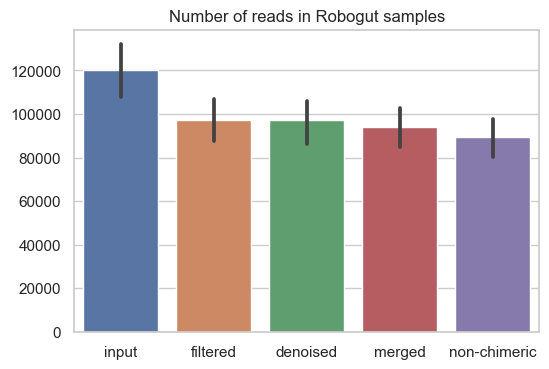

In [66]:
subplot_read_counts(m_save,'Sample-Type')
subplot_read_counts(m_save,'Sample-Des')

In [67]:
#Create a fraction of filtered reads col
m_save['frac_filtered'] = ((m_save['input'] - m_save['non-chimeric']) / m_save['input'])*100

In [68]:
#Remove blanks and see if there is sig in study samples
search_values = ['Ext_Control','Seq_Control']
df_blanks = m_save[m_save['Sample-Type'].str.contains('|'.join(search_values ))]
drop_list = df_blanks.index

df_no_blanks = m_save[~m_save.index.isin(drop_list) == False]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Run1 v.s. Run2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.888e-10 U_stat=9.240e+02
Run2 v.s. Run3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.890e-05 U_stat=1.290e+02
Run3 v.s. Run4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.451e-06 U_stat=2.474e+03
Run1 v.s. Run3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.926e-03 U_stat=8.940e+02
Run2 v.s. Run4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.336e+03
Run1 v.s. Run4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.885e-10 U_stat=3.028e+03


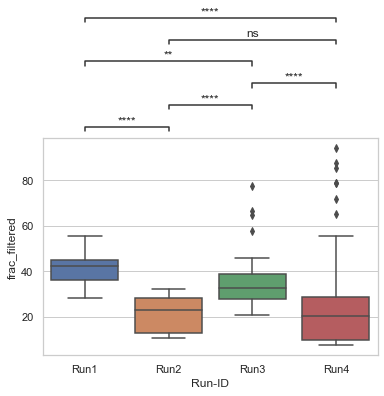

In [69]:
#Plot study samples for sig
list_order = list(df_depth_no_blanks["Run-ID"].unique()) #create list of unique elements
list_pairs = list(combinations(list_order,2)) #create pair list for len of element list

x_filt = "Run-ID"
y_filt = "frac_filtered"
mann_whitt_plot_sig(df_no_blanks,x_filt,y_filt,list_order,list_pairs,'mannwhitt_fracfilt_study')

In [70]:
#Remove study samples and see if there is sig in controls
search_values = ['Ext_Control','Seq_Control']
df_controls = m_save[~m_save['Sample-Type'].str.contains('|'.join(search_values ))]
drop_list = df_controls.index

df_no_study = m_save[~m_save.index.isin(drop_list) == True]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Run1 v.s. Run2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.888e-10 U_stat=9.240e+02
Run2 v.s. Run3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.890e-05 U_stat=1.290e+02
Run3 v.s. Run4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.451e-06 U_stat=2.474e+03
Run1 v.s. Run3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.926e-03 U_stat=8.940e+02
Run2 v.s. Run4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.336e+03
Run1 v.s. Run4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.885e-10 U_stat=3.028e+03


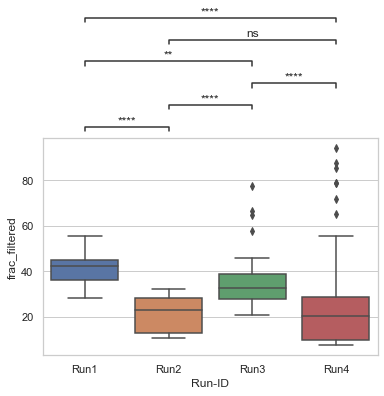

In [71]:
#Plot study samples for sig
list_order = list(df_depth_no_blanks["Run-ID"].unique()) #create list of unique elements
list_pairs = list(combinations(list_order,2)) #create pair list for len of element list

x_filt = "Run-ID"
y_filt = "frac_filtered"
mann_whitt_plot_sig(df_no_study,x_filt,y_filt,list_order,list_pairs,'mannwhitt_fracfilt_controls_run')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Seq_Control v.s. Ext_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.301e-02 U_stat=3.346e+03


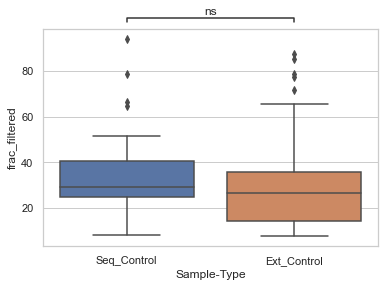

In [72]:
#Plot study samples for sig
list_order = list(df_depth_no_blanks["Sample-Type"].unique()) #create list of unique elements
list_pairs = list(combinations(list_order,2)) #create pair list for len of element list

x_filt = "Sample-Type"
y_filt = "frac_filtered"
mann_whitt_plot_sig(df_no_study,x_filt,y_filt,list_order,list_pairs,'mannwhitt_fracfilt_controls_st')

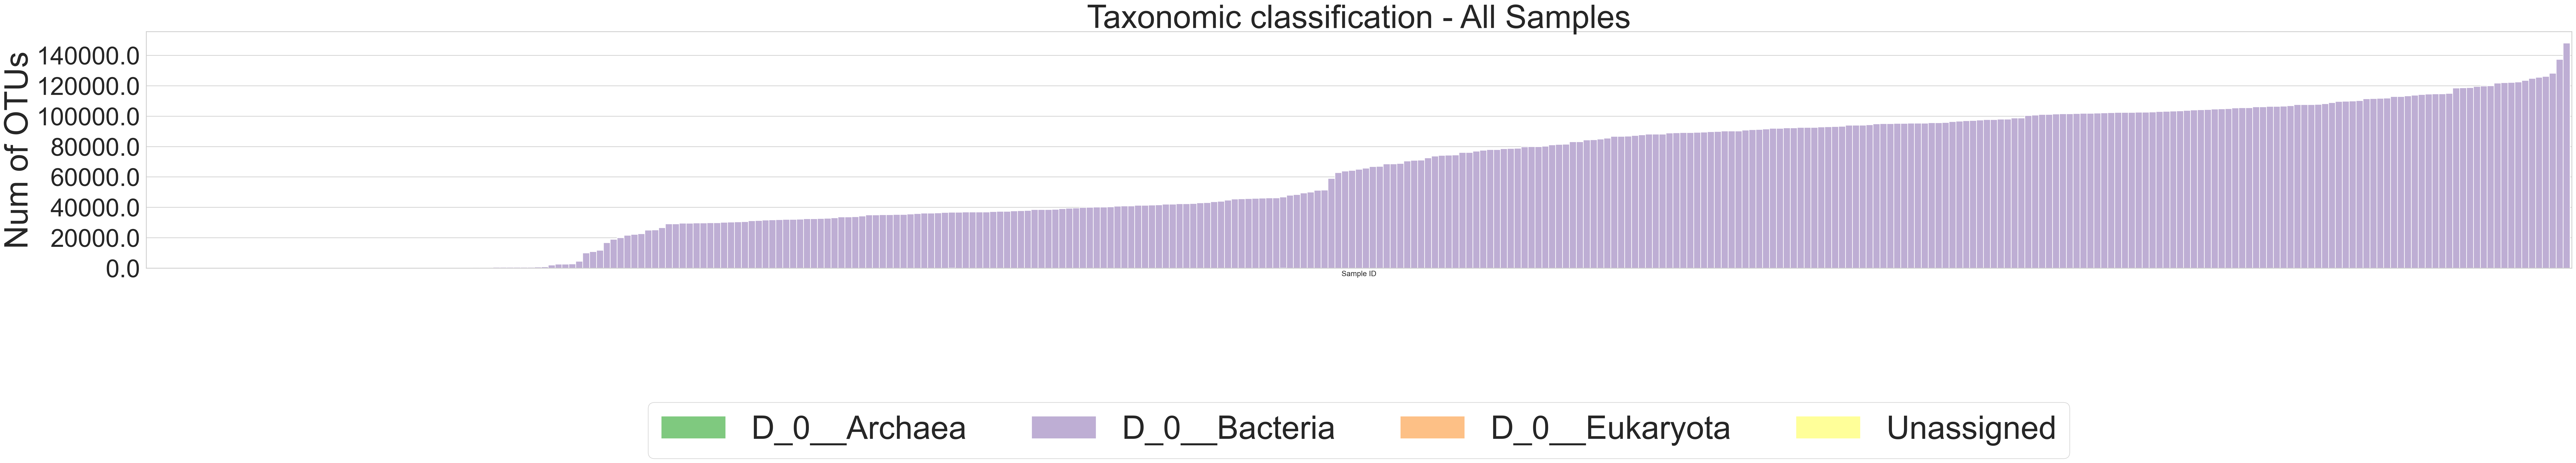

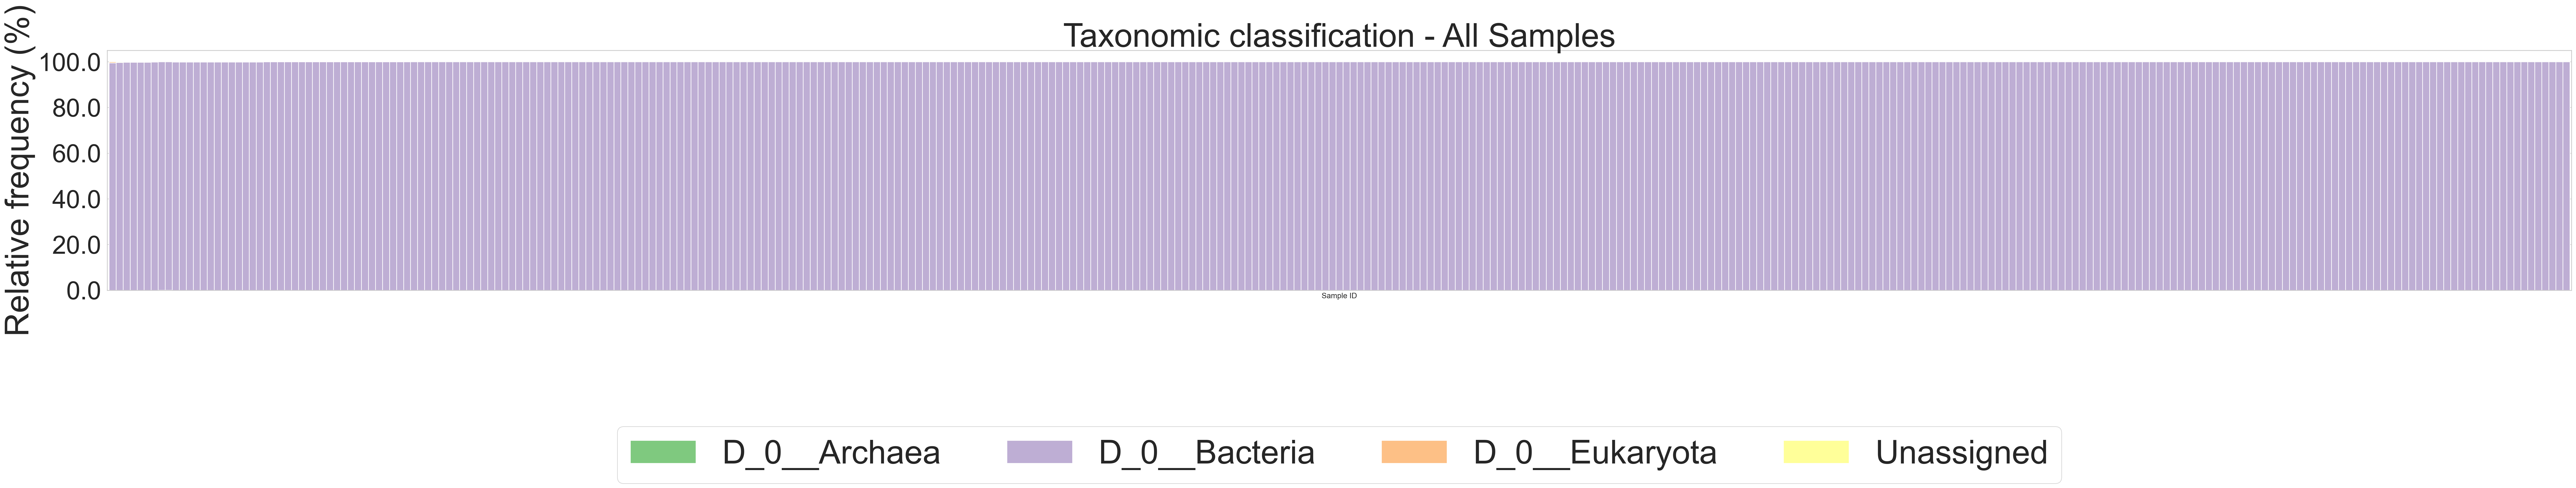

In [73]:
#plot clean data
col_list = ['D_0__Archaea','D_0__Bacteria','D_0__Eukaryota','Unassigned']

df_l1_abund = m_save[col_list].dropna(axis=1, how='all')  
plot_abund(df_l1_abund,'All Samples','Num of OTUs','output/img/abs_l1_clean')

df_l1_rel = df_l1_abund.div(df_l1_abund.sum(axis=1), axis=0) * 100 #axis=1 is along row
plot_abund(df_l1_rel,'All Samples','Relative frequency (%)','output/img/rel_l1_clean')

In [9]:
m_save.to_csv(r'manifest/m_cleaned.txt',header = m_save.columns,index = True, sep='\t')

NameError: name 'm_save' is not defined

Taxonomy

In [25]:
tax_complete = pd.read_csv(proj_dir+'taxonomy/Taxonomy_Complete.csv')

In [27]:
tax_complete

Domain     Kingdom               Phylum            Class  \
0   Bacteria  Eubacteria       Actinobacteria   Actinobacteria   
1   Bacteria  Eubacteria       Actinobacteria   Actinobacteria   
2   Bacteria  Eubacteria           Firmicutes          Bacilli   
3   Bacteria  Eubacteria           Firmicutes          Bacilli   
4   Bacteria  Eubacteria           Firmicutes          Bacilli   
..       ...         ...                  ...              ...   
66  Bacteria  Eubacteria           Firmicutes          Bacilli   
67  Bacteria       Fungi        Basidiomycota  Tremellomycetes   
68  Bacteria  Eubacteria  Dienococcus-Thermus       Deinococci   
69  Bacteria  Eubacteria           Firmicutes    Negativicutes   
70  Bacteria  Eubacteria           Firmicutes    Negativicutes   

              Order                         Family         Genus  \
0   Actinomycetales               Actinomycetaceae      Schaalia   
1   Actinomycetales               Actinomycetaceae   Actinomyces   
2        Bacillales                    Bacillaceae      Bacillus   
3        Bacillales                    Bacillaceae      Bacillus   
4        Bacillales                    Bacillaceae  Allobacillus   
..              ...                            ...           ...   
66       Bacillales  Tenericutes Incertae Sedis XI       Gemella   
67      Tremellales                   Tremellaceae  Cryptococcus   
68    Deinococcales                  Trueperaceae       Truepera   
69  Selenomonadales                Veillonellaceae     Dialister   
70  Selenomonadales                Veillonellaceae   Veillonella   

                      Species  \
0       Schaalia odontolytica   
1   Actinomyces odontolyticus   
2             Bacillus cereus   
3           Bacillus subtilis   
4   Allobacillus halotolerans   
..                        ...   
66        Gemella morbillorum   
67    Cryptococcus neoformans   
68      Truepera radiovictrix   
69     Dialister pneumosintes   
70        Veillonella parvula   

                                               Naming Gram  ...   DZ35316  \
0   D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...    P  ...  0.000000   
1   D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...    P  ...  0.000000   
2   D_0__Bacteria;D_1__Firmicutes;D_2__Bacilli;D_3...    P  ...  0.000000   
3   D_0__Bacteria;D_1__Firmicutes;D_2__Bacilli;D_3...    P  ...  0.000000   
4   D_0__Bacteria;D_1__Firmicutes;D_2__Bacilli;D_3...    A  ...  0.000000   
..                                                ...  ...  ...       ...   
66  D_0__Bacteria;D_1__Firmicutes;D_2__Bacilli;D_3...    P  ...  0.052239   
67  D_0__Bacteria;D_1__Basidiomycota;D_2__Tremello...    Y  ...  0.000000   
68  D_0__Bacteria;D_1__Dienococcus-Thermus;D_2__De...    I  ...  0.000000   
69  D_0__Bacteria;D_1__Firmicutes;D_2__Negativicut...    N  ...  0.001045   
70  D_0__Bacteria;D_1__Firmicutes;D_2__Negativicut...    N  ...  0.052239   

    MSA1000  MSA1001  MSA1002  MSA1003  D6300  D6305  D6306  D6310  D6311  
0       0.0   0.0000     0.05  0.00002  0.000  0.000  0.000  0.000  0.000  
1       0.0   0.0000     0.00  0.00000  0.000  0.000  0.000  0.000  0.000  
2       0.1   0.0448     0.05  0.01800  0.000  0.000  0.000  0.000  0.000  
3       0.0   0.0000     0.00  0.00000  0.174  0.174  0.174  0.012  0.012  
4       0.0   0.0000     0.00  0.00000  0.000  0.000  0.000  0.000  0.000  
..      ...      ...      ...      ...    ...    ...    ...    ...    ...  
66      0.0   0.0000     0.00  0.00000  0.000  0.000  0.000  0.000  0.000  
67      0.0   0.0000     0.00  0.00000  0.000  0.000  0.000  0.000  0.000  
68      0.0   0.0000     0.00  0.00000  0.000  0.000  0.000  0.000  0.000  
69      0.0   0.0000     0.00  0.00000  0.000  0.000  0.000  0.000  0.000  
70      0.0   0.0000     0.00  0.00000  0.000  0.000  0.000  0.000  0.000  

[71 rows x 21 columns]

In [46]:
tax = tax_complete.groupby('Genus').sum()
tax_genus = pd.DataFrame(tax)
pd.options.display.float_format = '{:.2E}'.format
tax_genus

DZ35322  DZ35316  MSA1000  MSA1001  MSA1002  MSA1003  \
Genus                                                                     
Acinetobacter     0.00E+00 0.00E+00 0.00E+00 0.00E+00 5.00E-02 1.80E-03   
Actinomyces       0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Allistipes        3.66E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Allobacillus      0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Anaerostipes      6.26E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Bacillus          0.00E+00 4.18E-02 1.00E-01 4.48E-02 5.00E-02 1.80E-02   
Bacteroides       6.26E-02 0.00E+00 0.00E+00 0.00E+00 5.00E-02 2.00E-04   
Barnesiella       0.00E+00 6.27E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Bifidobacterium   6.26E-02 6.27E-02 1.00E-01 4.00E-04 5.00E-02 2.00E-04   
Bilophila         2.35E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Campylobacter     0.00E+00 3.13E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Capnocytophaga    0.00E+00 5.22E-03 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Clostridium       0.00E+00 0.00E+00 1.00E-01 4.50E-03 5.00E-02 1.80E-02   
Collinsella       6.26E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Coprobacillus     3.66E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Cryptococcus      0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Cutibacterium     0.00E+00 0.00E+00 0.00E+00 0.00E+00 5.00E-02 1.80E-03   
Deinococcus       0.00E+00 0.00E+00 1.00E-01 4.00E-04 5.00E-02 2.00E-05   
Dialister         0.00E+00 1.04E-03 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Eggerthella       0.00E+00 3.66E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Eikenella         0.00E+00 4.18E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Enterococcus      6.26E-02 0.00E+00 1.00E-01 4.00E-04 5.00E-02 2.00E-05   
Escherichia       6.26E-02 0.00E+00 1.00E-01 4.48E-02 5.00E-02 1.80E-01   
Fusobacterium     1.25E-01 6.27E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Gemella           0.00E+00 5.22E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Granulicatella    0.00E+00 6.27E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Helicobacter      0.00E+00 0.00E+00 0.00E+00 0.00E+00 5.00E-02 1.80E-03   
Imtechella        0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Klebsiella        0.00E+00 6.27E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Lachnoclostridium 6.26E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Lactobacillus     3.66E-02 0.00E+00 1.00E-01 4.50E-03 5.00E-02 1.80E-03   
Leptotrichia      0.00E+00 5.22E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Listeria          0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Mogibacterium     0.00E+00 1.04E-03 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Neisseria         0.00E+00 6.27E-02 0.00E+00 0.00E+00 5.00E-02 1.80E-03   
Paenibacillus     3.66E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Parabacteroides   6.26E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Parvimonas        0.00E+00 3.13E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Pediococcus       4.18E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Porphyromonas     0.00E+00 0.00E+00 0.00E+00 0.00E+00 5.00E-02 1.80E-01   
Prevotella        0.00E+00 6.27E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Propionibacterium 6.26E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Pseudomonas       0.00E+00 0.00E+00 0.00E+00 0.00E+00 5.00E-02 1.80E-02   
Pyramidobacter    2.09E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Ralstonia         6.26E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Rhodobacter       0.00E+00 0.00E+00 1.00E-01 4.48E-01 5.00E-02 1.80E-01   
Saccharomyces     0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Salmonella        0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Schaalia          0.00E+00 0.00E+00 0.00E+00 0.00E+00 5.00E-02 2.00E-05   
Slackia           0.00E+00 3.66E-02 0.00E+00 0.00E+00 0.00E+00 0.00E+00   
Staphylococcus    0.00E+00 0.00E+00 1.00E-01 4.48E-01 1.00E-01 1.98E-01   
Stomatococcus     0.00E+00 6.27E-02 0.00E+00

In [48]:
tax_genus.to_csv(r'taxonomy/tax_genus.txt',header = tax_genus.columns,index = True, sep='\t')